In [1]:
# All the libraries needed
import random
import math
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import turtle
import matplotlib.pyplot as ply
from shapely.geometry import Polygon as SPolygon, Point, LineString
global n
import numpy as np
from scipy.stats import linregress
from sklearn.preprocessing import MinMaxScaler
import random
import operator

In [2]:
# Generate Initial Population
def generateInitialPopulation(count,numPoints):
    
    InitialPopulation=[]
    for i in range(count):
        points=[]
        for j in range(numPoints):
                singlePoint=[]
                x=random.randint(0,255)
                x=f'{x:08b}'
                singlePoint.append(x)
                y=random.randint(0,255)
                y=f'{y:08b}'
                singlePoint.append(y)
                points.append(singlePoint)
        InitialPopulation.append(points)
    return InitialPopulation

#Convert Binary to integer list
def convertToInt(List):
    answer=[]
    for i in List:
        points=[]
        for j in i:
            singlePoint=[]
            x=int(str(j[0]),2)
            y=int(str(j[1]),2)
            singlePoint.append(x)
            singlePoint.append(y)
            points.append(singlePoint)
        answer.append(points)
    return answer

# Check intersection of all the polygons
def checkIntersection(List):
    IntPopulation=convertToInt(List)
    count=0
    Answer=[]
    for j in IntPopulation:
#         print(j)
        
        allDone=False
        PointIntersection=[]
        for i in range(len(j)):
            intersect=0
            #print("X1 is = ",j[i][0],", Y1 is = ",j[i][1])
            p1 = Point(j[i][0], j[i][1])
            temp=i+1
            if temp==len(j):
                temp=0
                allDone=True
            p2 = Point(j[temp][0], j[temp][1])
            #print("X2 is = ",j[temp][0],", Y2 is = ",j[temp][1])
            currLine = LineString([p1, p2])
            done=False
            for k in range(len(j)):
                if k==i :
                    continue
                p1 = Point(j[k][0], j[k][1])
                #print("TO CHeck  - - -- - - ")
                #print("X1 is = ",j[k][0],", Y1 is = ",j[k][1])
                temp=k+1
                if temp==len(j):
                    temp=0
                    done=True
                p2 = Point(j[temp][0], j[temp][1])
                #print("X2 is = ",j[temp][0],", Y2 is = ",j[temp][1])
                checkLine = LineString([p1, p2])
                res = currLine.intersects(checkLine)
                if res==True:
                    intersect+=1
                #print ("Line {0} intersects l1: {1}".format(i, res))
                #print()
                if done==True:
                    intersect-=2
#                     print("Intersections is = ",intersect)
                    PointIntersection.append(intersect)
                    #print()
                    break
            if allDone==True:
                Answer.append(PointIntersection)
                break        
                
        
#         x=[]
#         y=[]
#         for i in j:
#             print(i)
#             x.append(i[0])
#             y.append(i[1])

#         x.append(IntPopulation[count][0][0])
#         y.append(IntPopulation[count][0][1])
#         count+=1
#         plt.plot(x,y,marker='o')
#         plt.show()  
#     print(Answer)
    return Answer

# Get angle between 2 vectors
def getAngle(a, b):
    adotb = np.dot(a,b)
    moda = math.sqrt(a[0]**2 + a[1]**2)
    modb = math.sqrt(b[0]**2 + b[1]**2)
    if moda==0:
        moda =1
    if modb==0:
        modb=1
    a=adotb/(moda*modb)
    a=round(a,2)
    return math.degrees(math.acos(a))

#Check if counter clockwise or not
def cross_sign(x1, y1, x2, y2):
    # True if cross is positive
    # False if negative or zero
    return x1 * y2 > x2 * y1
    
# Generate all the angles of the polygons
def checkAngles(List):
    Answer=[]
    Convex=[]
    for i in List:
        ans=0
        #concave
        angles=[]
        convex=[]
        for count in range(n):
            PrevP=[]
            CurrP=[]
            NextP=[]
            
            PrevPoint=count-1
            CurrPoint=count
            NextPoint=count+1
            
            if PrevPoint<0:
                PrevPoint=n-1
            if NextPoint==n:
                NextPoint=0
                
            PrevP.append(i[PrevPoint][0])
            PrevP.append(i[PrevPoint][1])
            
            CurrP.append(i[CurrPoint][0])
            CurrP.append(i[CurrPoint][1])
            
            NextP.append(i[NextPoint][0])
            NextP.append(i[NextPoint][1])
            
            x1, y1 = PrevP[0] - CurrP[0], PrevP[1] - CurrP[1]
            x2, y2 = NextP[0] - CurrP[0], NextP[1] - CurrP[1]
            a=[]
            a.append(x1)
            a.append(y1)
            b=[]
            b.append(x2)
            b.append(y2)
    
#             print("PrevP is = ",PrevP)
#             print("CurrP is = ",CurrP)
#             print("NextP is = ",NextP)
            
            
            # 0 For inner and 1 dor outer
            if cross_sign(x1, y1, x2, y2):
                convex.append(0)
                ang=getAngle(a,b)
                angles.append(ang)
#                 print(360-ang)
#                 //print('Inner Angle')
            else:
                ang=getAngle(b,a)
                angles.append(ang)
                convex.append(1)
#                 print(ang)
#                 print('Outer Angle')
#             print('')
        Answer.append(angles)
#         print()
        Convex.append(convex)
#         print( "- - --  -")
    return Answer,Convex
    
    

# Fitness function which return the fitness of all the polygons
def fitnessFunction(List):
    intersectionFitness=checkIntersection(List)
    totalAngle=(n-2)*180
#     print("Answer of intersectionFItness is = ",intersectionFitness)
    IntPopulation=convertToInt(List)
    AngleFitness,ConvexFitness=checkAngles(IntPopulation)
#     print(" - -- - ",AngleFitness)
    scaler = MinMaxScaler()
    AngleFitnessscaled = scaler.fit_transform(AngleFitness)
    TotalFitness=[]
#     for i in AngleFitness:
#         print(round(sum(i),4))
#     print()
#     print()
    for i in range(len(AngleFitnessscaled)):
        IntersectionCheck=intersectionFitness[i]
        IntersectionCheck=sum(IntersectionCheck)
#         print("Intersection is = ",IntersectionCheck)
#         print(round(sum(AngleFitnessscaled[i]),4))
        totalFitness=round(sum(AngleFitnessscaled[i]),4)        
        
        
        count0=ConvexFitness[i].count(0)
        count1=ConvexFitness[i].count(1)
        if count0==n and IntersectionCheck==0:
#             print("Here _count0 _ __")
#             print(IntersectionCheck)
            totalFitness+=10
#             print(sum(AngleFitness[i]))
        elif count1==n and IntersectionCheck==0:
#             print("Here _count1 _ __")
#             print(IntersectionCheck)
#             print(sum(AngleFitness[i]))
            totalFitness+=10
        elif IntersectionCheck>0:
            totalFitness*=-1
#             print(print(sum(AngleFitness[i])))
#         angle=sum(AngleFitness[i])
#         if math.isnan(angle)==False:
#             if int(angle)>=int(0.63*totalAngle) and int(angle)<=totalAngle:
#                 if IntersectionCheck==0:
#                     totalFitness+=5
        TotalFitness.append(totalFitness)
    return TotalFitness,ConvexFitness,AngleFitness,intersectionFitness

#This is to check if optimal fitness exists
def CheckFitness(Fitness,Angle):
    count=0
    for i in Fitness:
        if i>0:
            return True
    return False

# Check the goal state
def CheckGoal(ConvexFitness,intersectionfitness):
    for i in range(len(ConvexFitness)):
        count0=ConvexFitness[i].count(0)
        count1=ConvexFitness[i].count(1)
        IntersectionCheck=sum(intersectionfitness[i])
        if count0==n and IntersectionCheck==0:
            return True
        elif count1==n and IntersectionCheck==0:
            return True
    return False
           
            
# def CheckGaol(Fitness,Angle):|
# #     print(Fitness)
#     totalSum=180*(n-2)
# #     for i in Angle:
# #         print(i)
# #         if int(sum(i)) == totalSum:
# #             return True
# #     return False
    
#     curr=0
#     for i in Fitness:
#         check0=0
#         check1=0
#         for k in i:
#             if k==0:
#                 check0+=1
#             else:
#                 check1+=1
# #         print("Check 0 is = ",check0)
# #         print("Check 1 is = ",check1)
#         if check0==n:
#             return True
#         if check1==n:
#             return True

    
#     return False

#Print Polygons
def printPolygon(List):
    IntPopulation=convertToInt(List)
    count=0
    for j in IntPopulation:
        x=[]
        y=[]
        for i in j:
#             print(i)
            x.append(i[0])
            y.append(i[1])
        x.append(IntPopulation[count][0][0])
        y.append(IntPopulation[count][0][1])
        count+=1
        plt.plot(x,y,marker='o')
        plt.show()  

# ROulete WHeel selection
def rouletteWheelSelection(List,Fit):
    NewPopulation=[]
    sumFitnesses=sum(Fit)
    for i in range(totalPopulation):
        partialSum=0
        randomFitness=random.uniform(0,sumFitnesses)
#         print(randomFitness)
        for i in List:
            partialSum+=i[1]
            if not partialSum<randomFitness:
                NewPopulation.append(i)
                break
    return NewPopulation

#Crossover of the parents to create new population
def crossover(NewPop):
    crossPopulation=[]
    for i in range(len(NewPop)-1):
        CurrP=i
        NextP=i+1
        
        CurrP=NewPop[CurrP][0]
        NextP=NewPop[NextP][0]
        
#         print("CurrPX is = ",CurrP,"  and NextPX is = ",NextP)
#         print("CurrPY is = ",CurrP,"  and NextPY is = ",NextP)
        allPoints=[]
        allPoints2=[]
        for i in range(len(CurrP)):
            temp=[]
            temp2=[]
            CurrX=CurrP[i][0]
            CurrY=CurrP[i][1]
            
            NextX=NextP[i][0]
            NextY=NextP[i][1]
            
            randomSplit=random.randint(1,4)
#             print("Random Number generated is = ",randomSplit)
            Child1X=CurrX[0:randomSplit]+NextX[randomSplit:len(NextX)] 
            Child2X=NextX[0:randomSplit]+CurrX[randomSplit:len(CurrX)]
            
            randomSplit=random.randint(1,4)
#             print("Random Number generated is = ",randomSplit)
            Child1Y=CurrY[0:randomSplit]+NextY[randomSplit:len(NextY)]
            Child2Y=NextY[0:randomSplit]+CurrY[randomSplit:len(CurrY)]
            temp.append(Child1X)
            temp.append(Child1Y)
            allPoints.append(temp)
            temp2.append(Child2X)
            temp2.append(Child2Y)
            allPoints2.append(temp2)
#             print("Child1 X is = ",Child1X)
#             print("Child2 X is = ",Child2X)
#             print("Child1 Y is = ",CurrY[0:randomSplit]+NextY[randomSplit:len(NextY)]   )
#             print()
#         print("- - - - - - - ")
        crossPopulation.append(allPoints)
        crossPopulation.append(allPoints2)
    return crossPopulation

#Muatation of the cross over population
def mutation(crossPop):
    mutPopulation=[]
    for i in crossPop:
        allPoints=[]
        for j in i:
            temp=[]
#             print(j)
            X=j[0]
            Y=j[1]
#             print("Prev x is = ",X,"  Prev y is = ",Y)
            totalChangesX=random.randint(1,5)
            totalChangesY=random.randint(1,5)
            
            XPlaces=random.sample(range(0, 7), totalChangesX)
            YPlaces=random.sample(range(0, 7), totalChangesY)
            NewX=''
            NewY=''
            for i in range(len(X)):
                if i in XPlaces:
                    if X[i]=='0':
                        NewX+='1'
                    else:
                        NewX+='0'
                else:
                    NewX+=X[i]
                    
            for i in range(len(Y)):
                if i in YPlaces:
                    if Y[i]=='0':
                        NewY+='1'
                        
                    else:
                        NewY+='0'
                else:
                    NewY+=Y[i]
            temp.append(NewX)
            temp.append(NewY)
            allPoints.append(temp)
#             print("New x is = ",NewX,"  New y is = ",NewY)
        mutPopulation.append(allPoints)
    return mutPopulation
    
            

In [3]:
def GA():
    global n
    n=0
    while(1):
        n=int(input("Please enter the sides of the polygon = "))
        if int(n)>=3 and int(n)<=15:
            break
    gen=0
    global totalPopulation
    totalPopulation=int(input("Please enter the initial Population = "))
    BinaryPopulation=generateInitialPopulation(totalPopulation,n)
    counting=0
    answer=[]
    while(1):
        answer=[]
        Fitness,convexFitness,angleFitness,intersectionfitness=fitnessFunction(BinaryPopulation)
        checkFitness=CheckFitness(Fitness,angleFitness)
        PopulationWithFitness=[]
        if checkFitness == True :
            minFitness=min(Fitness)
            if minFitness < 0:
                minFitness*=-1
                for i in range(len(Fitness)):
                    Fitness[i]=Fitness[i]+minFitness

        for i in range(len(BinaryPopulation)):
            temp=[]
            temp.append(BinaryPopulation[i])
            temp.append(Fitness[i])
            PopulationWithFitness.append(temp)
        list1 = sorted(PopulationWithFitness, key=operator.itemgetter(1),reverse=True)
        list1=list1[0:totalPopulation]
        sortedBinaryList=[]
        count=0
        for i in range(len(list1)):
            sortedBinaryList.append(list1[i][0])
        #     print(list1[i])
        #     print()
        if checkFitness==True :
            counting+=1
            print("Chromosome with highest fitness is = ",sortedBinaryList[0])
            answer.append(sortedBinaryList[0])
            printPolygon(answer)
        if CheckGoal(convexFitness,intersectionfitness) == True:
            print("Gen is = ",gen)
            break


            # Now perform selection
        NewPopulation=rouletteWheelSelection(list1,Fitness)
        CrossPopulation=crossover(NewPopulation)
        BinaryPopulation=mutation(CrossPopulation)
        gen+=1
    

Please enter the sides of the polygon = 8
Please enter the initial Population = 50
Chromosome with highest fitness is =  [['10100101', '01001011'], ['01111101', '01010100'], ['00110011', '10100010'], ['01101111', '11100011'], ['00010000', '11001011'], ['00000111', '11001100'], ['00011110', '11110100'], ['11011011', '11010000']]


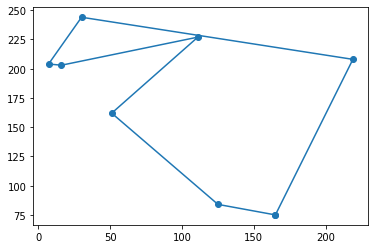

Chromosome with highest fitness is =  [['10000111', '11001011'], ['01100101', '10101110'], ['01101111', '11001110'], ['00111001', '11001001'], ['00100010', '10100001'], ['00111001', '01111000'], ['11001000', '10110000'], ['01101111', '10011000']]


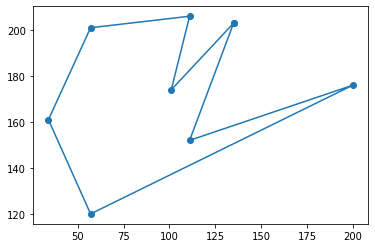

Chromosome with highest fitness is =  [['00110101', '11010101'], ['01101011', '10010000'], ['01001001', '11100100'], ['11001011', '10010011'], ['11110000', '01111011'], ['10001101', '00010100'], ['00011000', '00110010'], ['10000111', '01000010']]


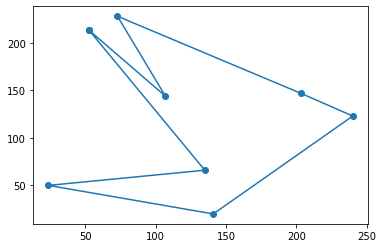

Chromosome with highest fitness is =  [['11110101', '00000011'], ['10001101', '00100010'], ['11110101', '00011010'], ['10101011', '10001101'], ['11001110', '01011101'], ['10011101', '10100010'], ['01111000', '11110010'], ['00000011', '00000010']]


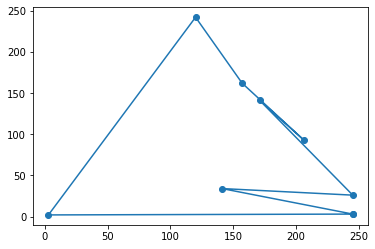

Chromosome with highest fitness is =  [['00100001', '11101111'], ['11110001', '10000010'], ['01001011', '11001100'], ['01100101', '01011001'], ['11101000', '00111101'], ['01111111', '00111000'], ['00001110', '00001010'], ['00011001', '00111010']]


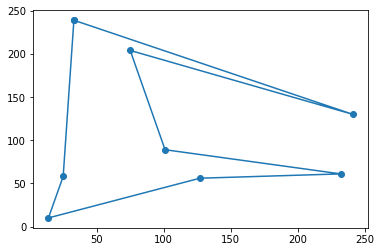

Chromosome with highest fitness is =  [['00100101', '01001111'], ['10011001', '00111000'], ['10101001', '00011110'], ['11101011', '00111001'], ['11101110', '11011101'], ['01101101', '11000110'], ['10001100', '11000000'], ['00001011', '01100100']]


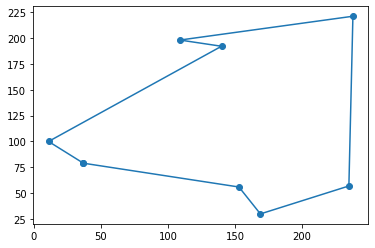

Chromosome with highest fitness is =  [['00010111', '00110101'], ['10000001', '00111100'], ['10110111', '01001110'], ['11000101', '11011111'], ['01100110', '01011001'], ['01101001', '01111110'], ['01111000', '10010100'], ['01010101', '11010110']]


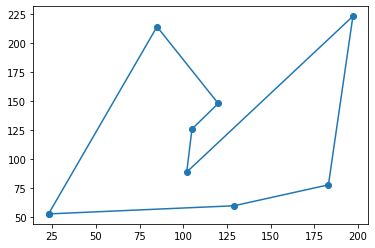

Chromosome with highest fitness is =  [['01010101', '11100101'], ['11100111', '11101000'], ['11101101', '01000100'], ['10101101', '00101001'], ['00110100', '00000001'], ['10101011', '01000100'], ['01111110', '10000110'], ['00100011', '10001100']]


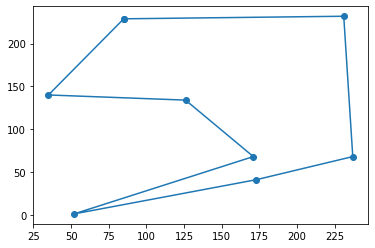

Chromosome with highest fitness is =  [['01000111', '10000001'], ['11010001', '01101000'], ['10000101', '10001000'], ['01111111', '11001001'], ['11110100', '01011101'], ['11000011', '01001000'], ['00001010', '10001110'], ['10100011', '11111000']]


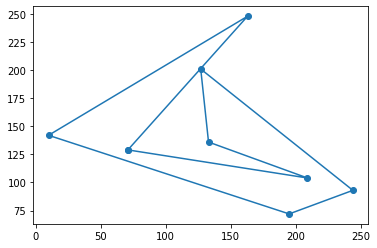

Chromosome with highest fitness is =  [['10111111', '01000001'], ['00111101', '10001110'], ['01010001', '10011110'], ['01111111', '10000001'], ['00101110', '11010101'], ['00000011', '10001000'], ['01001000', '00100100'], ['01000101', '00010010']]


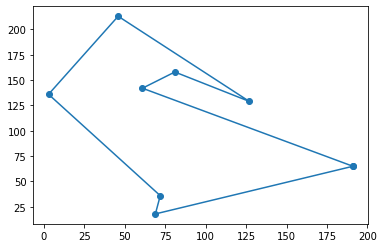

Chromosome with highest fitness is =  [['10100101', '11110111'], ['11101111', '10100000'], ['11111111', '00101110'], ['01001101', '01110101'], ['11100110', '00110001'], ['10001001', '00111110'], ['00010100', '00100000'], ['00001001', '11011010']]


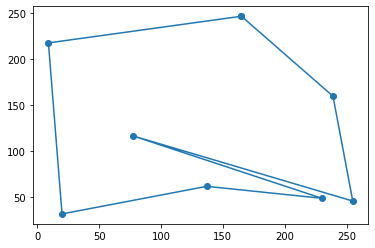

Chromosome with highest fitness is =  [['11010011', '00101101'], ['01111011', '00000100'], ['01110101', '00111110'], ['01000111', '01000101'], ['01001010', '01011011'], ['11000001', '11110110'], ['01100100', '01100010'], ['01010011', '01001010']]


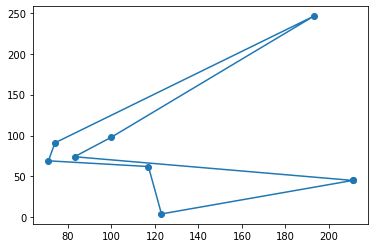

Chromosome with highest fitness is =  [['11001111', '11100011'], ['11000111', '11101000'], ['10100001', '11001100'], ['10001101', '01110001'], ['01010110', '01010001'], ['01100111', '00000010'], ['11000100', '10000010'], ['11010001', '10100010']]


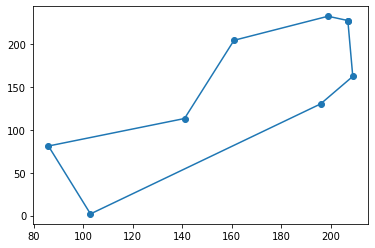

Chromosome with highest fitness is =  [['01101111', '10101011'], ['00111011', '11111010'], ['01001111', '10110000'], ['00011001', '11101111'], ['01100110', '00010111'], ['01011111', '01000110'], ['11100100', '00110000'], ['11100101', '01011100']]


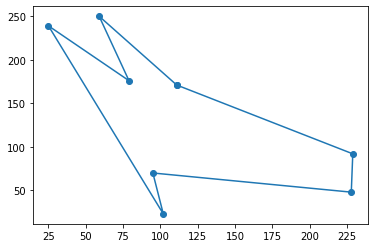

Chromosome with highest fitness is =  [['11101011', '01001011'], ['11010101', '00011010'], ['10011101', '00010000'], ['00110111', '10001101'], ['01010110', '10000101'], ['10010011', '01000110'], ['11010100', '10110110'], ['11001111', '01000010']]


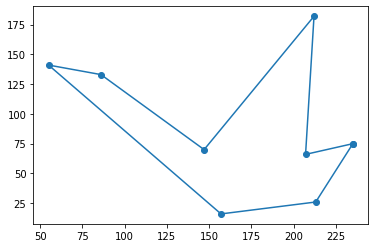

Chromosome with highest fitness is =  [['00100001', '01000111'], ['01101111', '00111110'], ['10110101', '10100010'], ['11010111', '11000111'], ['11010100', '11110011'], ['10011101', '10011000'], ['00001010', '11010000'], ['00001001', '10100110']]


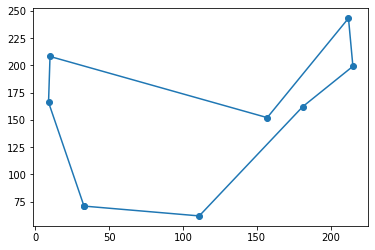

Chromosome with highest fitness is =  [['01111111', '01011111'], ['10100011', '10101100'], ['11011001', '11001000'], ['10001001', '11110001'], ['00100000', '11101011'], ['00010001', '01110110'], ['01101100', '01010110'], ['10110011', '00111110']]


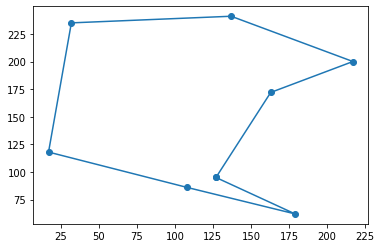

Chromosome with highest fitness is =  [['10111001', '01011001'], ['10000101', '01111100'], ['10111001', '00010010'], ['00101101', '10010101'], ['00111110', '00100011'], ['11111111', '00000010'], ['10111000', '11001110'], ['01111011', '11101100']]


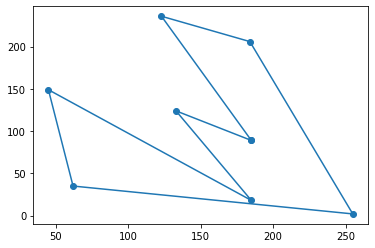

Chromosome with highest fitness is =  [['11011101', '10011111'], ['10100011', '10111110'], ['10001011', '01111000'], ['10010101', '11001111'], ['10010110', '11100001'], ['00011101', '10101000'], ['01000100', '00001110'], ['10010011', '00100000']]


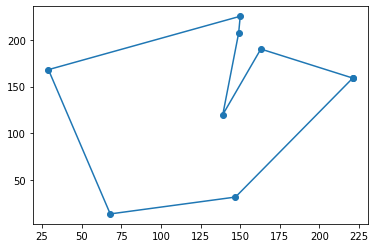

Chromosome with highest fitness is =  [['01001001', '00011101'], ['10100001', '00110100'], ['11111111', '00100000'], ['11100001', '01000111'], ['11011100', '01100101'], ['01001001', '01100010'], ['10001010', '11010000'], ['00001001', '10001110']]


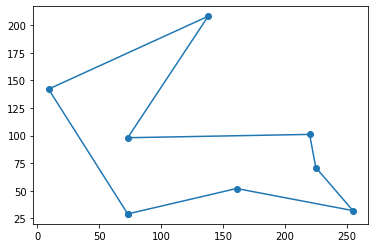

Chromosome with highest fitness is =  [['11010011', '10001001'], ['11100101', '01111000'], ['11111011', '01110000'], ['11100001', '01100011'], ['11011000', '00000111'], ['11001001', '00111110'], ['01011010', '00111100'], ['01100101', '01101000']]


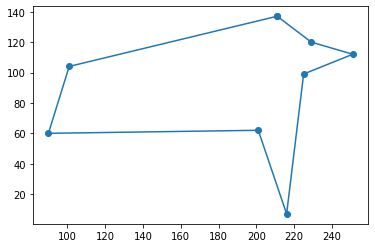

Chromosome with highest fitness is =  [['10111101', '11011111'], ['00110001', '11100110'], ['01100101', '10100010'], ['01110101', '00110111'], ['00000010', '10011111'], ['00001011', '01001110'], ['01010010', '00101000'], ['11101111', '01100100']]


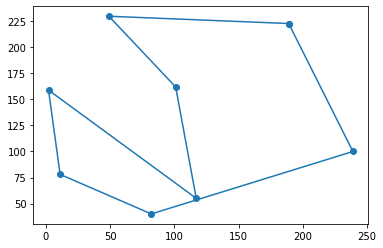

Chromosome with highest fitness is =  [['11110001', '10001011'], ['11111011', '11010100'], ['11011101', '11001000'], ['10101001', '11111001'], ['01011110', '11110001'], ['10011011', '11010000'], ['10100010', '00110010'], ['10111001', '01110010']]


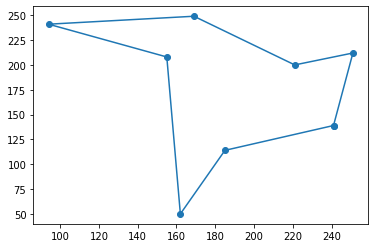

Chromosome with highest fitness is =  [['01101001', '11001011'], ['00111111', '01011100'], ['01110001', '01111000'], ['11111101', '11111101'], ['01111110', '01100001'], ['01111111', '00101000'], ['01100010', '00111010'], ['00010111', '01000010']]


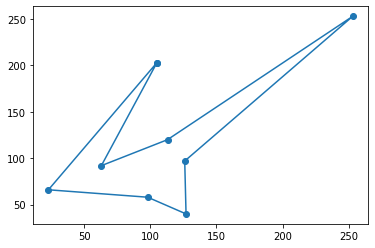

Chromosome with highest fitness is =  [['00110111', '10100001'], ['01001001', '10000110'], ['01011001', '00110110'], ['11111111', '11010011'], ['00101110', '10100101'], ['00101101', '10000010'], ['00010100', '01100010'], ['00110101', '00010100']]


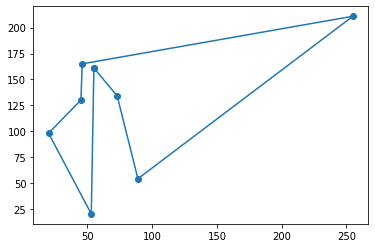

Chromosome with highest fitness is =  [['10100111', '01101111'], ['10101111', '01001110'], ['10110111', '00011000'], ['10001001', '10110001'], ['00100010', '11001011'], ['10011101', '11000100'], ['11101100', '00011000'], ['10101011', '01110000']]


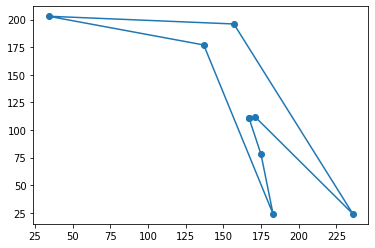

Chromosome with highest fitness is =  [['00001101', '00010111'], ['11001011', '11001110'], ['11101111', '11100110'], ['01000111', '00011101'], ['01101000', '00011111'], ['11010101', '10001000'], ['11100100', '00101010'], ['10011001', '00100010']]


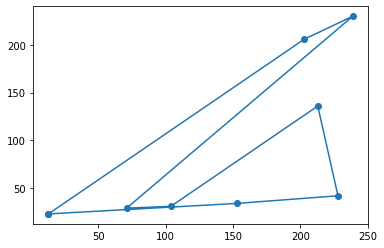

Chromosome with highest fitness is =  [['00100111', '10110111'], ['01001101', '10011110'], ['01111101', '10111000'], ['11011011', '11100101'], ['10101010', '00110011'], ['11100001', '01000100'], ['10011100', '00010010'], ['01100111', '01111010']]


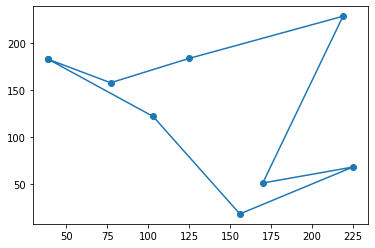

Chromosome with highest fitness is =  [['01111001', '10101101'], ['01010001', '00011000'], ['10111111', '00111110'], ['01100011', '11110011'], ['11100010', '00111111'], ['01010101', '00001110'], ['00011110', '00011110'], ['01001101', '11010000']]


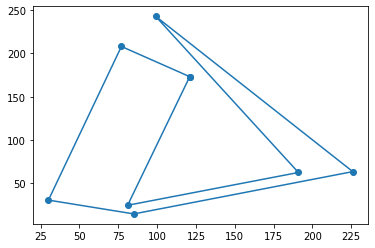

Chromosome with highest fitness is =  [['11001001', '11110111'], ['00010111', '11011000'], ['10100001', '10101100'], ['10101011', '00011111'], ['10101110', '00010101'], ['11110101', '00011100'], ['11000010', '10101110'], ['11101011', '01100100']]


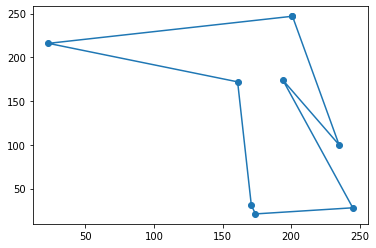

Chromosome with highest fitness is =  [['11011111', '10111001'], ['01111101', '11101100'], ['11010011', '11011010'], ['11100011', '11001111'], ['11101010', '00111101'], ['01010101', '11011100'], ['11010010', '01011000'], ['11100011', '10000010']]


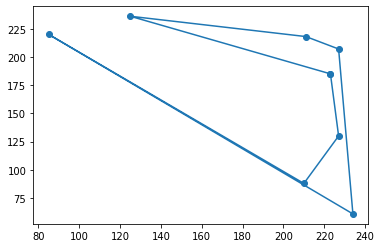

Chromosome with highest fitness is =  [['10101101', '00100011'], ['11101111', '11001000'], ['10010011', '11100100'], ['01011101', '10101011'], ['00011100', '01101011'], ['01011101', '10000010'], ['10101100', '00011110'], ['11100101', '10101100']]


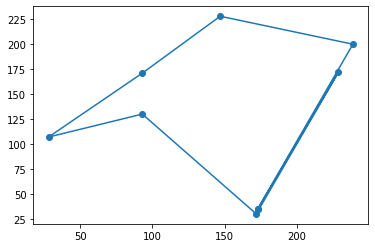

Chromosome with highest fitness is =  [['01011001', '00011111'], ['00101001', '11100000'], ['00111011', '01000110'], ['00011001', '10110111'], ['00000010', '00000101'], ['01011111', '00011000'], ['01101110', '10010010'], ['01011011', '10011010']]


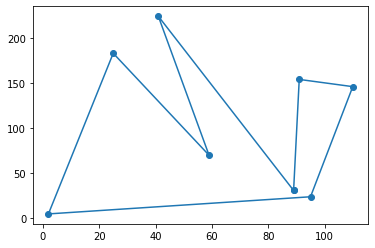

Chromosome with highest fitness is =  [['01011001', '10101101'], ['01011111', '11011100'], ['01111111', '01111100'], ['01111101', '01110011'], ['10011110', '00111011'], ['01010111', '11111110'], ['00101100', '11011000'], ['01111011', '01101000']]


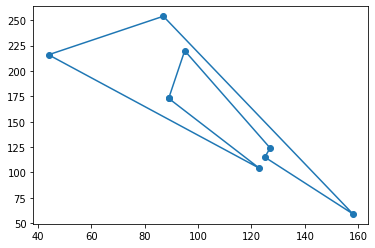

Chromosome with highest fitness is =  [['10001101', '10000001'], ['01011111', '01011010'], ['01010001', '00110100'], ['10011001', '00101001'], ['01010010', '00100011'], ['00101011', '00111010'], ['10110000', '11111010'], ['11100011', '11001100']]


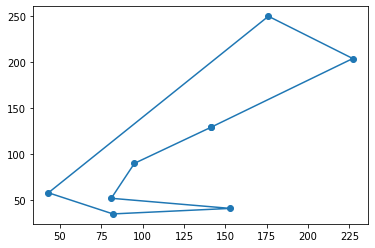

Chromosome with highest fitness is =  [['11000001', '10001011'], ['11011011', '00011110'], ['10110111', '10000010'], ['10010001', '01010111'], ['00001100', '00110101'], ['00001001', '10101110'], ['11011010', '11111110'], ['10001011', '11001010']]


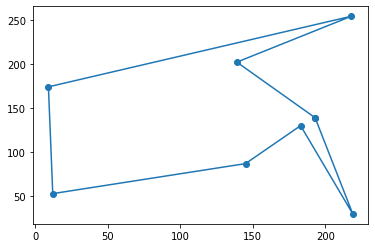

Chromosome with highest fitness is =  [['00110101', '01010001'], ['01110111', '11001100'], ['10010011', '11011100'], ['01111001', '00000111'], ['10000100', '00010111'], ['11101111', '10001110'], ['11101100', '00010000'], ['01011111', '00000000']]


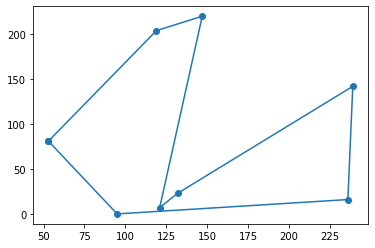

Chromosome with highest fitness is =  [['00001001', '10001101'], ['00000001', '00111100'], ['00111111', '01101000'], ['00101011', '01001011'], ['01000100', '01101111'], ['00101111', '10010010'], ['10101000', '11000010'], ['10010011', '11101100']]


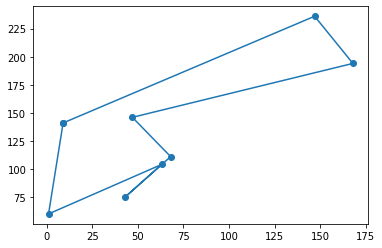

Chromosome with highest fitness is =  [['10010001', '01111001'], ['10110001', '01111010'], ['10111011', '01110100'], ['01001001', '11100011'], ['11011000', '01111111'], ['10101001', '01001010'], ['01101010', '00001110'], ['10110001', '01110000']]


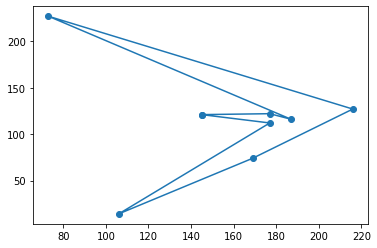

Chromosome with highest fitness is =  [['00001111', '00010111'], ['01101111', '10110110'], ['00111011', '10011010'], ['00101011', '10100011'], ['01010000', '10101011'], ['00001011', '11111000'], ['00001000', '11001000'], ['00000111', '00100100']]


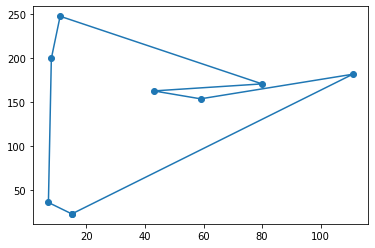

Chromosome with highest fitness is =  [['01100001', '10011001'], ['00111001', '01011100'], ['10101101', '00001110'], ['11000111', '10000101'], ['10110000', '10101001'], ['11001001', '11101000'], ['10010000', '11111110'], ['00000011', '00110010']]


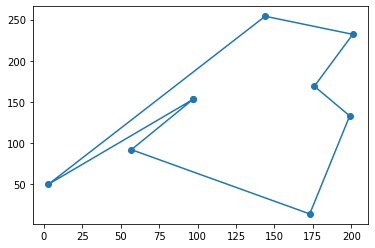

Chromosome with highest fitness is =  [['01110001', '10001101'], ['00111011', '01101110'], ['01011001', '11101000'], ['00011101', '00010001'], ['10000110', '01101001'], ['11010001', '00011000'], ['10101110', '10000000'], ['01101101', '11000010']]


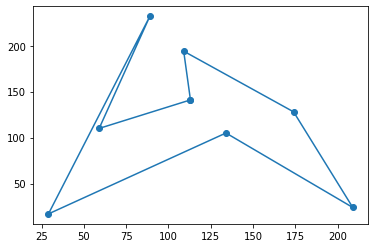

Chromosome with highest fitness is =  [['11110111', '11001001'], ['00010101', '11101110'], ['00010111', '10000110'], ['00000001', '00001101'], ['00010000', '00000011'], ['01000011', '10100110'], ['00100010', '00000000'], ['01110011', '00001000']]


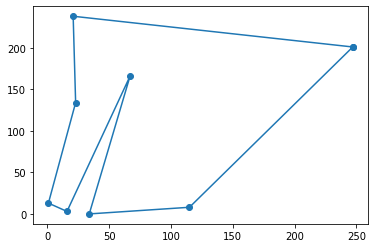

Chromosome with highest fitness is =  [['10110001', '10110011'], ['00100001', '11100110'], ['00011011', '10100000'], ['00100011', '00110101'], ['00010100', '00011101'], ['11111001', '10100010'], ['10101000', '11110110'], ['10000001', '11110100']]


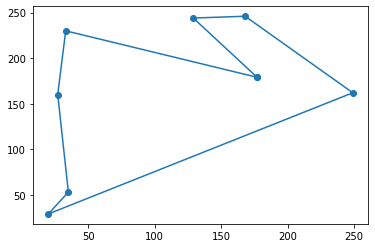

Chromosome with highest fitness is =  [['11100001', '01010011'], ['01010101', '10010000'], ['10101101', '01100100'], ['01011111', '00110011'], ['01001110', '01001001'], ['00110111', '10010010'], ['00010100', '01111110'], ['00101101', '10101010']]


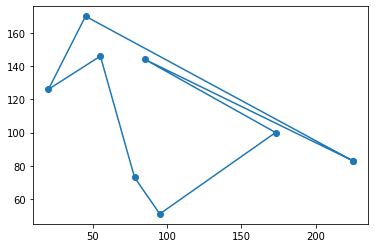

Chromosome with highest fitness is =  [['11100101', '00001001'], ['01111001', '01000110'], ['10110111', '01101010'], ['11010101', '10111011'], ['01011110', '10001011'], ['01010011', '10000000'], ['00011100', '11000110'], ['01011101', '00000010']]


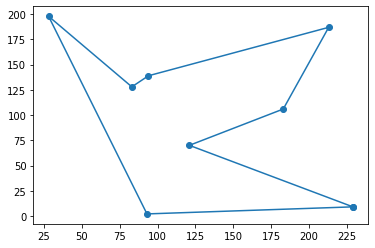

Chromosome with highest fitness is =  [['00110111', '10010011'], ['00111001', '01111110'], ['00110001', '01000110'], ['00000011', '10101001'], ['00100100', '11001001'], ['00110101', '11011110'], ['10011010', '11110000'], ['10111101', '11011100']]


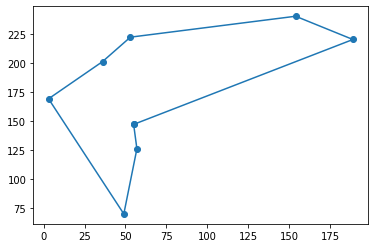

Chromosome with highest fitness is =  [['10111011', '01001101'], ['10100011', '01111100'], ['01011101', '01001110'], ['10110111', '10100011'], ['01011110', '11111001'], ['00100001', '00000010'], ['10011100', '01100110'], ['11111001', '00010100']]


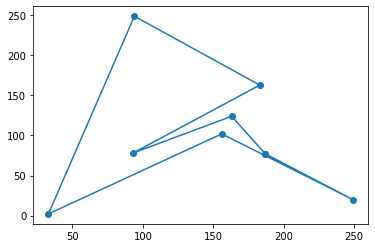

Chromosome with highest fitness is =  [['10111101', '10011001'], ['10000101', '01111100'], ['01110001', '01111000'], ['00000111', '01000011'], ['01000110', '10101101'], ['10001101', '11110100'], ['11110010', '10110000'], ['01100111', '01001000']]


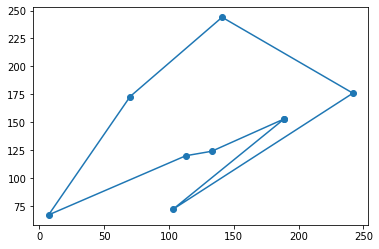

Chromosome with highest fitness is =  [['01101111', '10010001'], ['01001101', '00100110'], ['11010001', '00010110'], ['11001111', '01101011'], ['10110100', '10100001'], ['10110001', '10011000'], ['01110100', '01100110'], ['01110001', '10111000']]


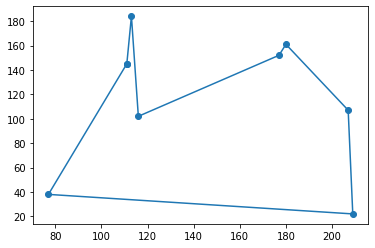

Chromosome with highest fitness is =  [['10000101', '10111101'], ['11100001', '01111110'], ['11001111', '10000000'], ['10000011', '00101111'], ['01101000', '11101011'], ['01111011', '11011000'], ['11001110', '11111000'], ['11000011', '11011110']]


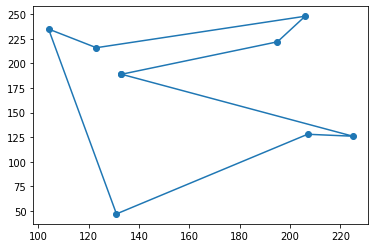

Chromosome with highest fitness is =  [['10101101', '00011001'], ['00001111', '11010110'], ['11011011', '11001000'], ['10001101', '01011011'], ['11100100', '10111011'], ['10111101', '10001110'], ['11111000', '11000000'], ['10011101', '01100000']]


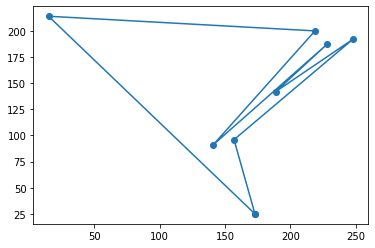

Chromosome with highest fitness is =  [['00111001', '11111011'], ['00100011', '10011000'], ['10010111', '00110110'], ['11011011', '10101111'], ['11111100', '00010101'], ['11110111', '11011100'], ['11101010', '11101110'], ['10110101', '10001110']]


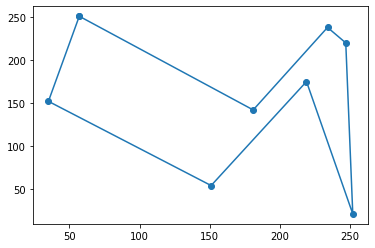

Chromosome with highest fitness is =  [['10100001', '11101111'], ['00010011', '01000110'], ['00100111', '00001000'], ['10101011', '01000001'], ['11000000', '00111111'], ['10101101', '10000000'], ['10101110', '01011110'], ['10000001', '01100100']]


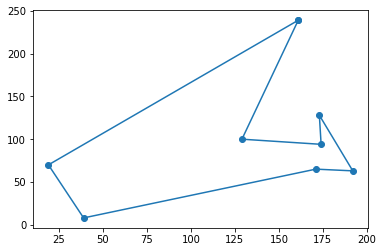

Chromosome with highest fitness is =  [['00011011', '10101011'], ['01000101', '10100000'], ['01110001', '01000100'], ['10011111', '11000001'], ['11101100', '10100011'], ['00111001', '00011000'], ['00001110', '00011000'], ['00101011', '10001100']]


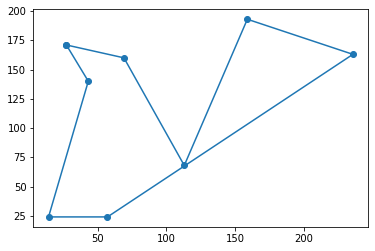

Chromosome with highest fitness is =  [['10111101', '11111101'], ['10000111', '11110110'], ['11001111', '00100000'], ['10001001', '00010001'], ['10010000', '01000101'], ['01110011', '11011110'], ['00011000', '10101100'], ['00011111', '11110100']]


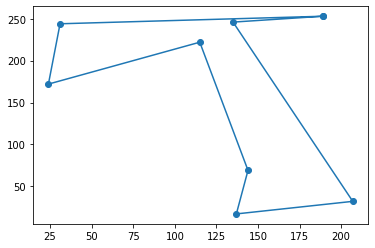

Chromosome with highest fitness is =  [['00100011', '11010001'], ['00000101', '01110110'], ['00100001', '00111100'], ['11001111', '10100111'], ['11110110', '10111111'], ['00011101', '01100000'], ['00010000', '01110000'], ['10110101', '10100110']]


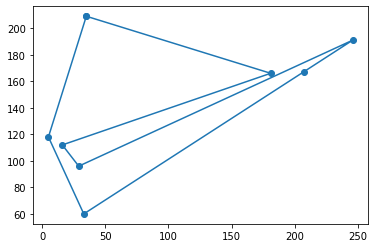

Chromosome with highest fitness is =  [['10001001', '00110101'], ['01100011', '00111110'], ['00101011', '01110110'], ['00010001', '11100011'], ['01000100', '10101001'], ['10000001', '01000100'], ['10001100', '11011010'], ['11010001', '00000110']]


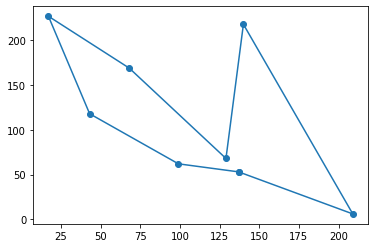

Chromosome with highest fitness is =  [['01101111', '00000111'], ['10111011', '00011010'], ['10101111', '10001100'], ['11100001', '10100101'], ['10111110', '00101001'], ['11110001', '10100010'], ['01001100', '11101000'], ['00010011', '00101110']]


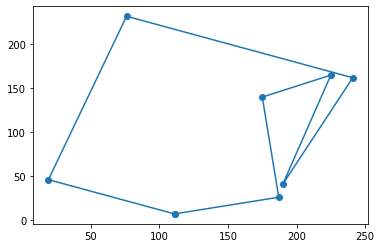

Chromosome with highest fitness is =  [['11000111', '11010011'], ['11001001', '01100100'], ['10100111', '00110000'], ['01010101', '10001101'], ['01011010', '10000011'], ['11000001', '00000110'], ['00110000', '00001100'], ['00110011', '10011000']]


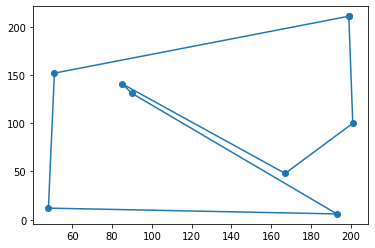

Chromosome with highest fitness is =  [['00011001', '10110011'], ['01000111', '01011110'], ['01100011', '01011010'], ['00100011', '00011001'], ['01111000', '00000001'], ['10101101', '00110010'], ['10010100', '10011110'], ['01001011', '10011100']]


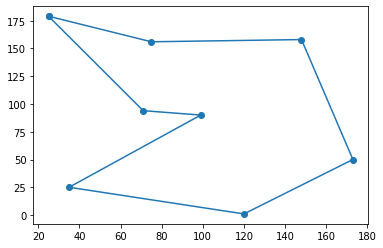

Chromosome with highest fitness is =  [['10101101', '00000101'], ['01010101', '11000100'], ['00001001', '11010100'], ['00010011', '11010101'], ['01010110', '11001101'], ['01100011', '10101000'], ['10101100', '10010100'], ['11110101', '00010100']]


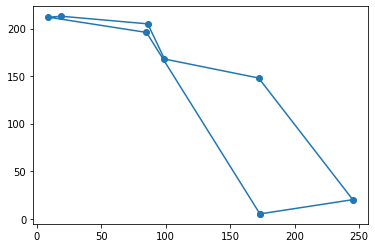

Chromosome with highest fitness is =  [['10010101', '01100111'], ['10000111', '10100010'], ['10011111', '10010000'], ['01001101', '11110001'], ['00010000', '11100001'], ['00010011', '10111000'], ['01011100', '00011100'], ['11111101', '00011010']]


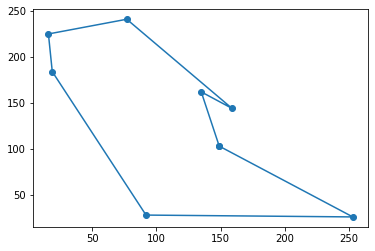

Chromosome with highest fitness is =  [['00110101', '10100001'], ['01101001', '10101100'], ['00100011', '01111010'], ['10010111', '00111101'], ['10000110', '00110111'], ['10110001', '00001000'], ['11010010', '10101010'], ['11001111', '11100100']]


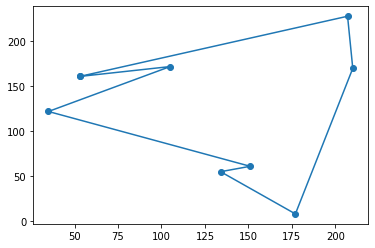

Chromosome with highest fitness is =  [['01110111', '10000101'], ['00110111', '01100110'], ['00000101', '00001010'], ['00100111', '10010111'], ['10000000', '11110111'], ['11011001', '11011000'], ['01111110', '10111100'], ['11001001', '01011000']]


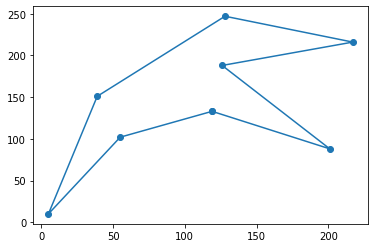

Chromosome with highest fitness is =  [['01110111', '00011111'], ['10101011', '01100000'], ['11111011', '11010010'], ['01111001', '10000001'], ['01001100', '01101101'], ['11001111', '11100010'], ['00101000', '11001000'], ['00010011', '00100010']]


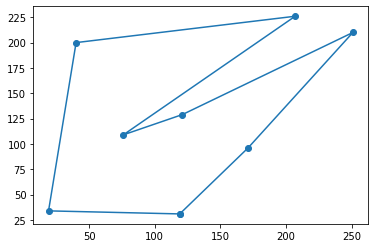

Chromosome with highest fitness is =  [['10001001', '10101111'], ['00001101', '10010010'], ['01011111', '10110000'], ['01010101', '10110111'], ['00000100', '11110011'], ['00010111', '11111110'], ['11001000', '10011010'], ['11110001', '01111100']]


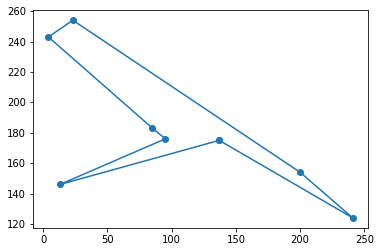

Chromosome with highest fitness is =  [['01110001', '01010111'], ['00110001', '10000000'], ['00100101', '01001000'], ['00001011', '11101101'], ['11110000', '11000101'], ['10100011', '10101010'], ['11110000', '01011010'], ['10101101', '00001000']]


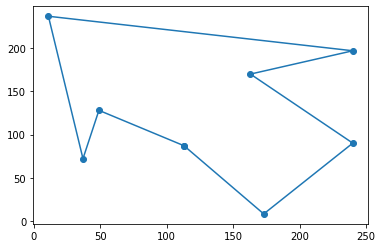

Chromosome with highest fitness is =  [['00111101', '11001111'], ['01011101', '01110000'], ['01000001', '01011000'], ['01011011', '01101111'], ['00010010', '11101001'], ['01100001', '11111000'], ['10000110', '10111010'], ['10000001', '00110110']]


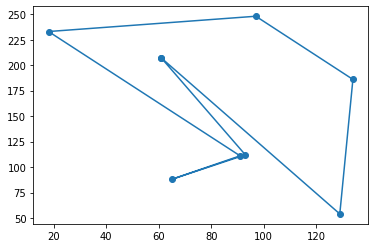

Chromosome with highest fitness is =  [['11111001', '00001111'], ['10110001', '10100000'], ['10101101', '01111100'], ['10110111', '00100111'], ['00110110', '00111011'], ['00010111', '11011000'], ['00010100', '11110110'], ['11001101', '11101010']]


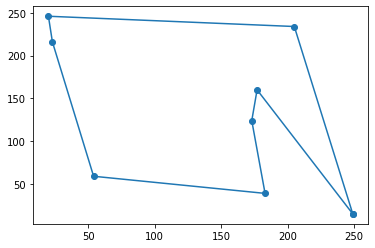

Chromosome with highest fitness is =  [['11110111', '10001111'], ['10010011', '00000000'], ['00011011', '00110010'], ['00111111', '01110111'], ['00001100', '10111111'], ['01110101', '01011000'], ['01010110', '10100100'], ['11001101', '10011000']]


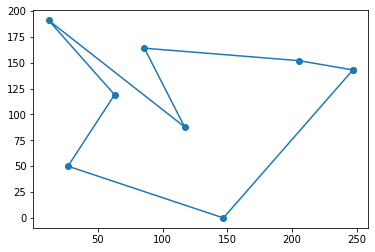

Chromosome with highest fitness is =  [['10000111', '01010001'], ['11001101', '00011110'], ['00011111', '10000010'], ['10010001', '01110001'], ['00011000', '11100101'], ['11011111', '11000000'], ['11011100', '10010110'], ['11111001', '00110000']]


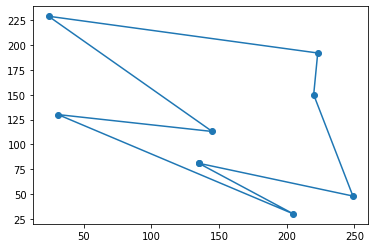

Chromosome with highest fitness is =  [['01110011', '11011101'], ['11101001', '11001110'], ['11010101', '10110100'], ['11110101', '00011101'], ['10100010', '10110011'], ['11101011', '00100100'], ['10100110', '01011100'], ['00110101', '00010110']]


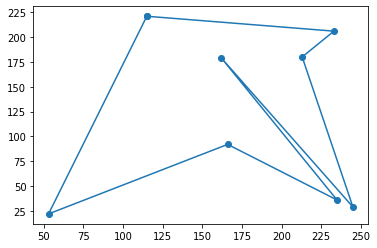

Chromosome with highest fitness is =  [['00011101', '01110011'], ['01011001', '01000100'], ['01100001', '01011000'], ['01011101', '11000101'], ['01001000', '11001111'], ['11110011', '11011000'], ['10011100', '11001110'], ['10100101', '00001000']]


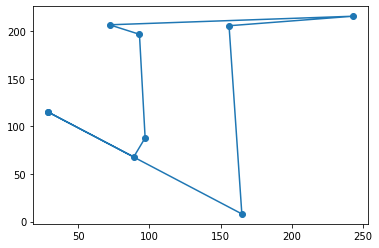

Chromosome with highest fitness is =  [['01100001', '01001111'], ['01110101', '00111010'], ['01000011', '00001000'], ['00001111', '11001111'], ['11001110', '11100011'], ['11000111', '10111100'], ['11100100', '01101100'], ['10110111', '01011010']]


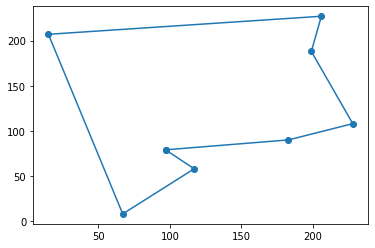

Chromosome with highest fitness is =  [['11010011', '01010111'], ['11000101', '11110110'], ['11000011', '10001110'], ['01011001', '01110001'], ['01100010', '00110101'], ['11000011', '00011110'], ['11101100', '00000100'], ['11110011', '00111010']]


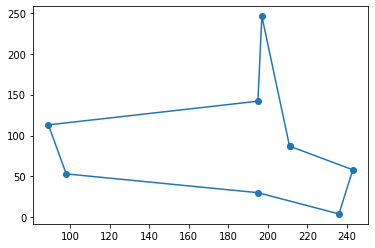

Chromosome with highest fitness is =  [['00011011', '00101001'], ['01000111', '00110110'], ['00001001', '01110000'], ['01001111', '11111011'], ['00111000', '10011101'], ['01011001', '01100010'], ['10011010', '00111100'], ['11100101', '00100000']]


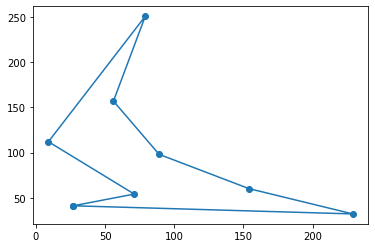

Chromosome with highest fitness is =  [['00001101', '10110011'], ['00000111', '01110100'], ['11111111', '10000100'], ['10100011', '11000001'], ['10001000', '10101101'], ['01010111', '01111100'], ['01011100', '11110110'], ['00101101', '10011110']]


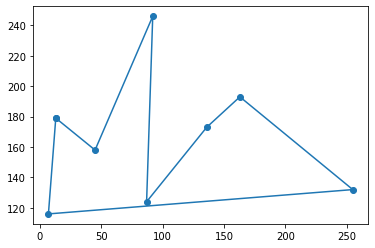

Chromosome with highest fitness is =  [['10101001', '01110111'], ['00100101', '10010000'], ['01010001', '01100010'], ['11010011', '01101001'], ['11011100', '10101101'], ['11011111', '11110110'], ['00100010', '11110010'], ['10110101', '11101000']]


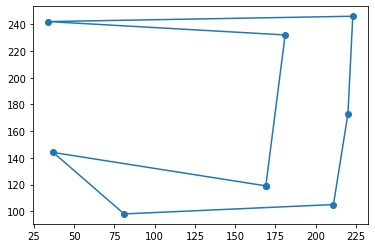

Chromosome with highest fitness is =  [['10111011', '10110001'], ['00111111', '01101010'], ['10101111', '10000100'], ['11011001', '11011111'], ['00110000', '10110001'], ['00000101', '00001010'], ['00100100', '01111010'], ['00101101', '10010010']]


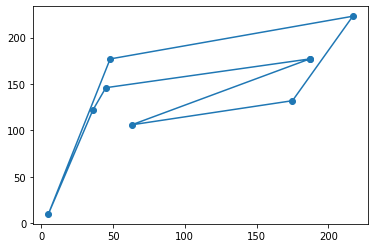

Chromosome with highest fitness is =  [['10100101', '01000001'], ['11101101', '00011100'], ['01000011', '11100100'], ['00010101', '10101001'], ['00110110', '01101011'], ['11000011', '00010000'], ['00011000', '10100110'], ['01100011', '10100110']]


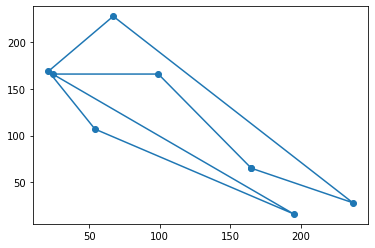

Chromosome with highest fitness is =  [['01111111', '00111011'], ['10100111', '11010110'], ['00010111', '01111100'], ['10101101', '11111011'], ['10010110', '01100111'], ['10011101', '00111110'], ['00011010', '00110000'], ['10000111', '10111100']]


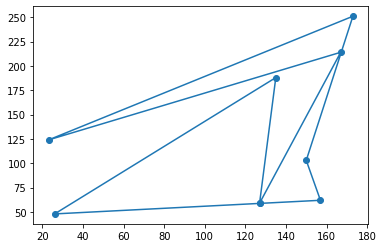

Chromosome with highest fitness is =  [['11101111', '01100001'], ['11101101', '11001110'], ['10101001', '11011010'], ['10101001', '11100111'], ['00011000', '11000111'], ['00100111', '01111000'], ['01011110', '11010010'], ['11001101', '10101110']]


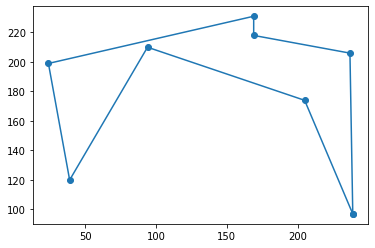

Chromosome with highest fitness is =  [['11101011', '00001101'], ['11011001', '00101010'], ['11110011', '01110110'], ['11001011', '11110001'], ['00101000', '11010001'], ['01110001', '01010010'], ['01111110', '01001100'], ['11000011', '00010000']]


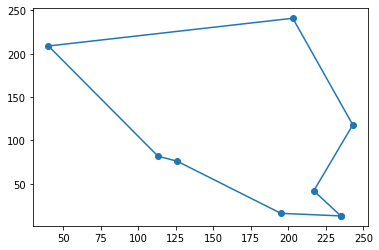

Chromosome with highest fitness is =  [['00100101', '10000011'], ['00100001', '10000000'], ['00000111', '00111100'], ['10110011', '01110001'], ['11011000', '10000011'], ['01111101', '10111110'], ['10000000', '10010000'], ['00111101', '10000010']]


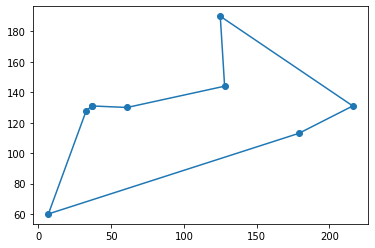

Chromosome with highest fitness is =  [['10100101', '10110101'], ['01101111', '10001010'], ['00101011', '00011100'], ['01101101', '10001001'], ['11000010', '11100011'], ['11001011', '11000000'], ['10100110', '01111100'], ['01001101', '00000110']]


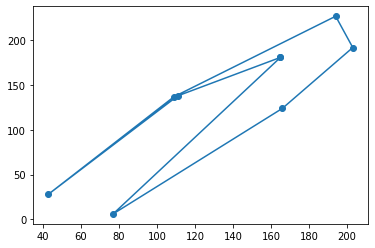

Chromosome with highest fitness is =  [['11000111', '01001001'], ['01111001', '10011010'], ['10001011', '01000110'], ['01110101', '10100101'], ['10011100', '11101111'], ['01100101', '10001010'], ['00100100', '10011010'], ['01100101', '01000000']]


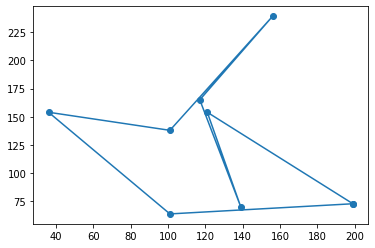

Chromosome with highest fitness is =  [['10101101', '01000011'], ['00110001', '00010000'], ['00101011', '10111010'], ['01111101', '01010011'], ['10100100', '01101101'], ['01000001', '10100010'], ['11100000', '11001110'], ['10011111', '01000110']]


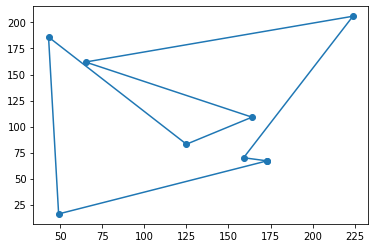

Chromosome with highest fitness is =  [['00110111', '11011001'], ['10111011', '11111100'], ['11000011', '10011000'], ['01011011', '00011101'], ['10010010', '01101011'], ['01011001', '01011110'], ['00010010', '00100100'], ['00110011', '01110000']]


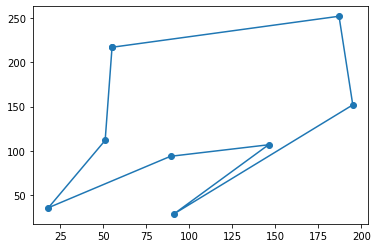

Chromosome with highest fitness is =  [['01000111', '11110101'], ['01001001', '11011010'], ['00000111', '10111000'], ['10010011', '11001001'], ['01110100', '10000111'], ['00101011', '01011000'], ['10111100', '10011100'], ['10110111', '11010000']]


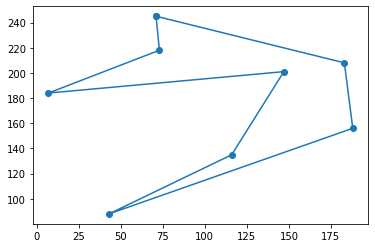

Chromosome with highest fitness is =  [['11011101', '11010111'], ['10001111', '01110010'], ['10000011', '11000000'], ['00001001', '11001011'], ['00111010', '00110101'], ['11010001', '00010000'], ['11100010', '11101110'], ['10111101', '00100000']]


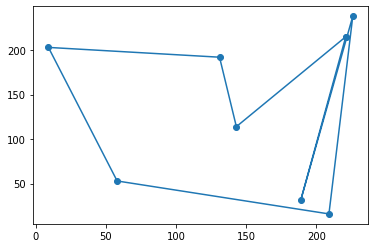

Chromosome with highest fitness is =  [['00111101', '01111101'], ['11001011', '00101100'], ['11000001', '00010010'], ['01100001', '00000101'], ['00010110', '01011001'], ['10101101', '11111010'], ['11100000', '11001000'], ['11010111', '10010100']]


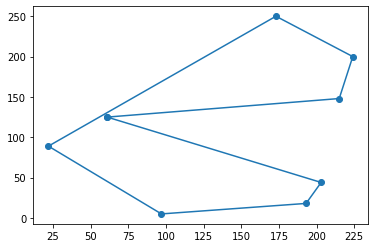

Chromosome with highest fitness is =  [['11001101', '11001001'], ['00101101', '01101110'], ['01101101', '11001110'], ['00001101', '10000011'], ['00110100', '01011011'], ['10010111', '00010000'], ['01100000', '01110010'], ['11010001', '00000010']]


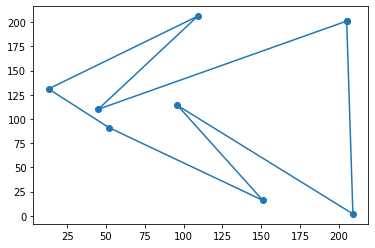

Chromosome with highest fitness is =  [['01000001', '01011011'], ['01111101', '00001100'], ['00010001', '01110000'], ['00001101', '11101111'], ['11110010', '10111111'], ['01111101', '11000000'], ['01100110', '10011010'], ['10001111', '00101100']]


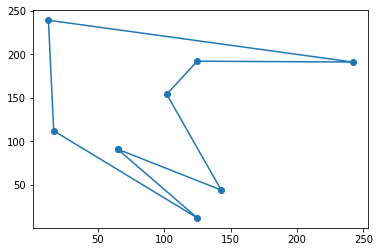

Chromosome with highest fitness is =  [['10110101', '11000111'], ['10000111', '01001010'], ['11001011', '00001100'], ['10110001', '01000111'], ['11000100', '11001101'], ['11000101', '11010010'], ['10110000', '11010010'], ['10001011', '11101000']]


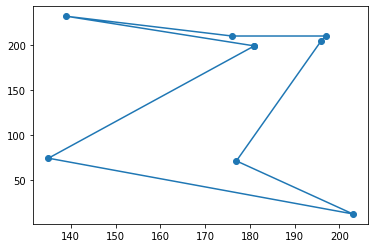

Chromosome with highest fitness is =  [['11100111', '11001001'], ['11000111', '10011000'], ['10000001', '10101000'], ['00011101', '10010101'], ['10110000', '00110011'], ['00110011', '01011010'], ['00000010', '10110010'], ['00011001', '11000110']]


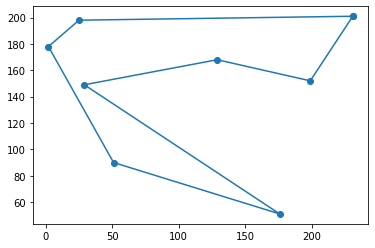

Chromosome with highest fitness is =  [['10010111', '10011001'], ['01010111', '10111100'], ['00100011', '11010010'], ['00101001', '10100111'], ['01011000', '10111001'], ['10001111', '00010000'], ['10010100', '01001010'], ['11010011', '01111010']]


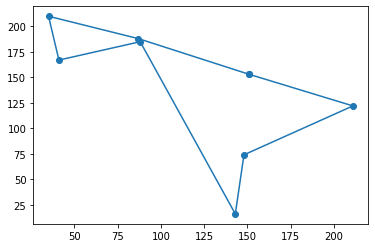

Chromosome with highest fitness is =  [['01010001', '11100111'], ['01001111', '01110100'], ['01000101', '00001110'], ['01111111', '00011001'], ['01101100', '01010111'], ['11101001', '01011010'], ['11010010', '10101110'], ['10010001', '10000010']]


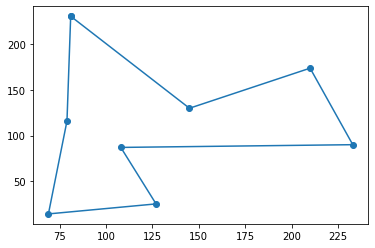

Chromosome with highest fitness is =  [['01011101', '01111011'], ['11001011', '11000010'], ['01111001', '11100110'], ['00101111', '11110101'], ['01001000', '10000011'], ['00110001', '00011000'], ['10101000', '00000010'], ['11101001', '00111110']]


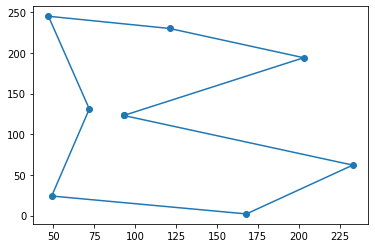

Chromosome with highest fitness is =  [['00001011', '01010101'], ['01011101', '10010010'], ['10111011', '01100100'], ['00000001', '00001101'], ['10110010', '00001111'], ['11110011', '11101100'], ['10101110', '11110000'], ['01111011', '11010010']]


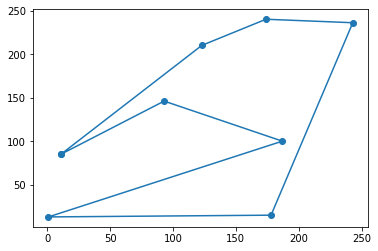

Chromosome with highest fitness is =  [['10011011', '00100011'], ['11110001', '01111010'], ['11010011', '10001100'], ['11000001', '11001001'], ['10011100', '11010101'], ['00011001', '10111000'], ['00010100', '00010100'], ['01000101', '00110000']]


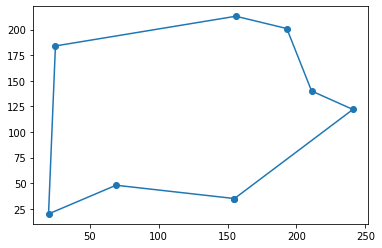

Chromosome with highest fitness is =  [['11010001', '01110011'], ['10000111', '10011100'], ['00110111', '01001100'], ['11000101', '00011001'], ['10010110', '00100011'], ['10000111', '00001100'], ['00110000', '00111110'], ['01011001', '11000110']]


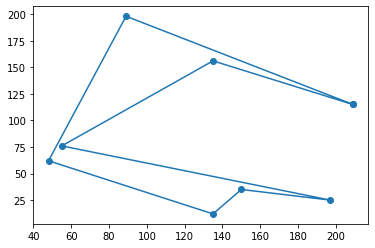

Chromosome with highest fitness is =  [['10010101', '00111001'], ['01011101', '10110000'], ['00101011', '00010000'], ['00100111', '10101001'], ['10010100', '11101001'], ['11001101', '11110110'], ['10111100', '01000010'], ['10011101', '01100010']]


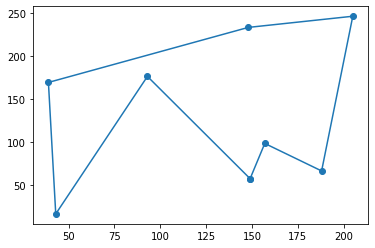

Chromosome with highest fitness is =  [['01011011', '10010101'], ['00101011', '01100010'], ['01101001', '11111010'], ['11100101', '10001001'], ['01100100', '01101001'], ['00111111', '01001110'], ['01010010', '00000000'], ['00001011', '00100010']]


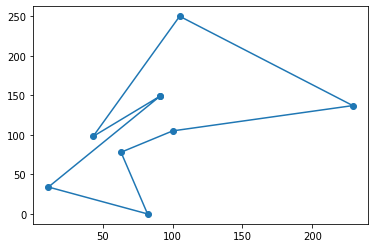

Chromosome with highest fitness is =  [['01101111', '01110011'], ['10000011', '01000100'], ['10000001', '01000000'], ['01100111', '00001001'], ['11111000', '00100001'], ['10110101', '01100100'], ['10110100', '11111110'], ['00000011', '10010100']]


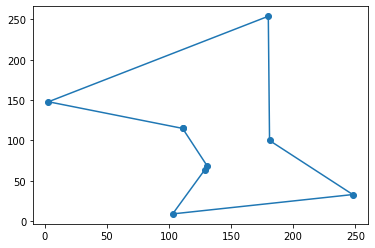

Chromosome with highest fitness is =  [['11010011', '11110001'], ['10001111', '11111010'], ['01001001', '01101000'], ['11010111', '00001011'], ['11011010', '00010001'], ['10101001', '10010110'], ['11100000', '01011000'], ['10110011', '10110100']]


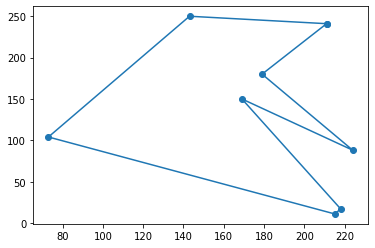

Chromosome with highest fitness is =  [['10110111', '00111111'], ['00100001', '00001010'], ['01101011', '10010010'], ['00000101', '01110111'], ['11111100', '11101111'], ['10100101', '01110010'], ['11111000', '10101110'], ['10001101', '01010110']]


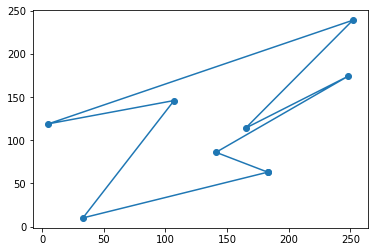

Chromosome with highest fitness is =  [['10100001', '01010001'], ['11100001', '00001100'], ['11011011', '01010000'], ['11111011', '01100001'], ['11101100', '11111101'], ['11001101', '10001000'], ['11011010', '11000010'], ['10111001', '10111000']]


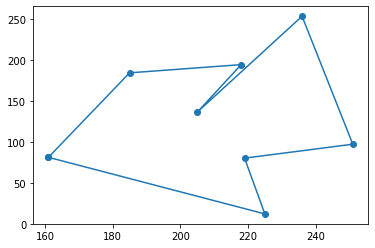

Chromosome with highest fitness is =  [['10100111', '11011001'], ['11110101', '01010010'], ['01000001', '01111010'], ['10010101', '00100001'], ['11010010', '00001111'], ['11101101', '00001000'], ['00010000', '00100100'], ['00101111', '10101000']]


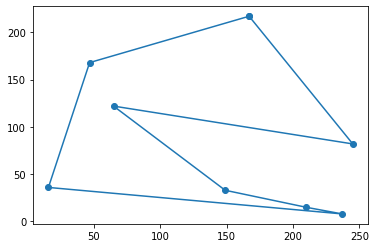

Chromosome with highest fitness is =  [['01100101', '11101011'], ['10000101', '11011010'], ['00000001', '11111010'], ['01100011', '10001011'], ['00011110', '10100111'], ['00100111', '00111110'], ['00110000', '01011100'], ['11001111', '11101110']]


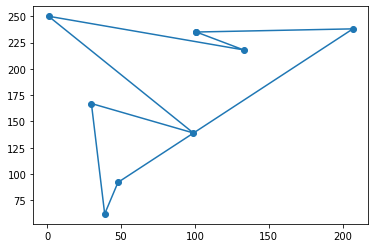

Chromosome with highest fitness is =  [['01100101', '10100011'], ['10111011', '10011110'], ['10000001', '01100010'], ['10110011', '00101111'], ['11011100', '00100111'], ['11001111', '11010000'], ['11100010', '00100000'], ['00011111', '00011000']]


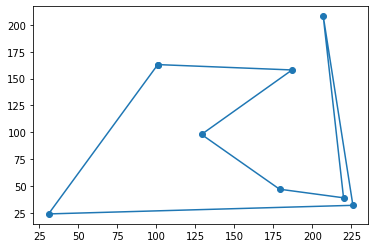

Chromosome with highest fitness is =  [['01001011', '01011101'], ['00000111', '10001000'], ['00101111', '10011000'], ['01110101', '01010111'], ['11000110', '10111111'], ['10110111', '01011110'], ['00111110', '01000110'], ['01010111', '01001110']]


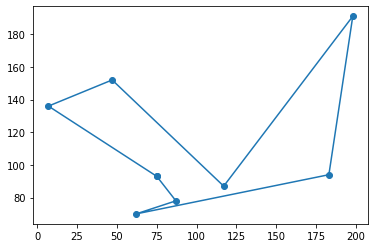

Chromosome with highest fitness is =  [['11110011', '00001011'], ['00001101', '01000010'], ['00001001', '11011000'], ['00110001', '11001111'], ['11100100', '11110111'], ['11111111', '10111000'], ['00110000', '10100100'], ['10001011', '01111000']]


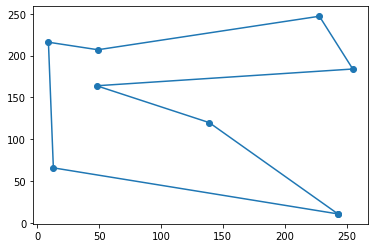

Chromosome with highest fitness is =  [['00001111', '00110001'], ['00111011', '00001100'], ['01110001', '01000110'], ['11000001', '11011001'], ['10001000', '11000101'], ['10000011', '11111100'], ['01111000', '10111100'], ['00001111', '01000010']]


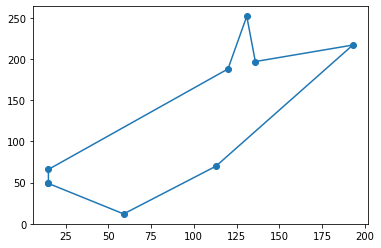

Chromosome with highest fitness is =  [['10000011', '10101101'], ['01011101', '00010100'], ['00101111', '00110110'], ['01101101', '11101001'], ['11010110', '11101001'], ['11110011', '01000010'], ['11000100', '00101000'], ['10101001', '01101010']]


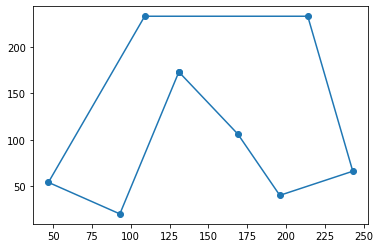

Chromosome with highest fitness is =  [['11011001', '01100011'], ['11110111', '10110110'], ['00111001', '11110110'], ['00100111', '01100011'], ['10010100', '10010111'], ['10011101', '01001010'], ['11011110', '00101100'], ['11100111', '01010100']]


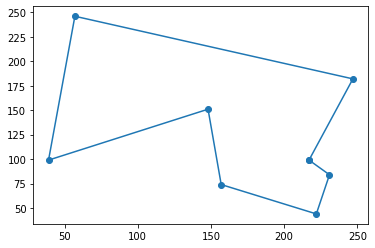

Chromosome with highest fitness is =  [['00011101', '11100011'], ['01001011', '11100000'], ['01011101', '11111010'], ['01111001', '01101101'], ['10001000', '10111011'], ['11111001', '00100010'], ['10010000', '00001110'], ['00010111', '11011010']]


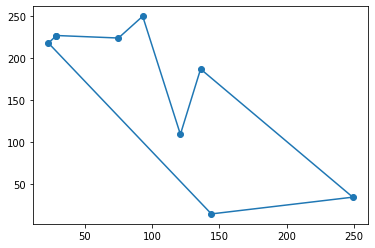

Chromosome with highest fitness is =  [['01011101', '11100001'], ['11001111', '11000000'], ['00101111', '10011100'], ['01110111', '10000001'], ['01111100', '01100111'], ['00111101', '01001010'], ['00110000', '01101100'], ['00011001', '11101000']]


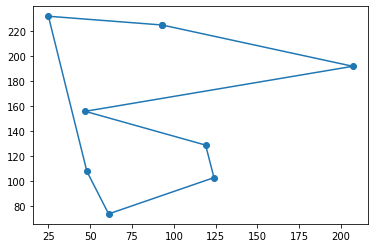

Chromosome with highest fitness is =  [['01100001', '11100111'], ['01001011', '11110110'], ['11101001', '11011010'], ['11100011', '10101101'], ['10011000', '10101001'], ['00011001', '00110110'], ['01100110', '11001000'], ['01110101', '10011010']]


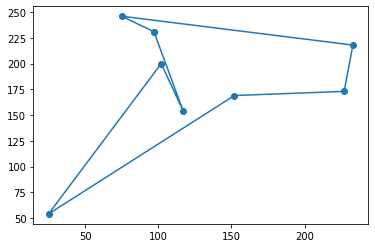

Chromosome with highest fitness is =  [['01010101', '00111111'], ['00111001', '01111000'], ['11001101', '00111010'], ['01000011', '10011001'], ['11101000', '10010011'], ['11011001', '00000110'], ['11000100', '00101000'], ['01110011', '00101010']]


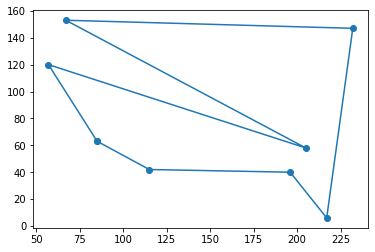

Chromosome with highest fitness is =  [['00001101', '01101101'], ['11001011', '00010110'], ['10100111', '01000010'], ['10000001', '01101001'], ['10100100', '11010011'], ['11000001', '11101100'], ['01011100', '11110110'], ['00100101', '11011100']]


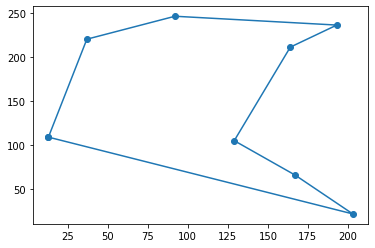

Chromosome with highest fitness is =  [['10101111', '01000011'], ['10100001', '01101000'], ['11001101', '00011100'], ['01110001', '00000111'], ['00000010', '00100111'], ['00011111', '00111010'], ['00111110', '10100010'], ['10100001', '00110110']]


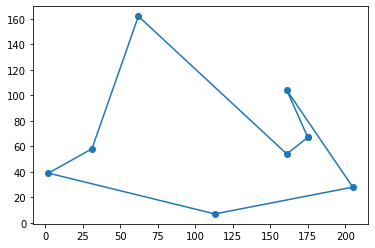

Chromosome with highest fitness is =  [['01110001', '11010001'], ['01100101', '10001010'], ['10101111', '00001100'], ['10001011', '10101111'], ['10110000', '00111001'], ['10100101', '01110010'], ['10110100', '10100000'], ['01111111', '11110100']]


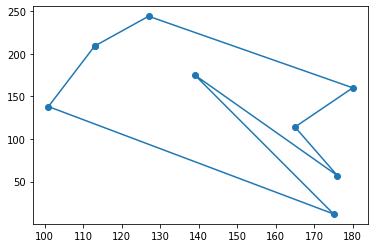

Chromosome with highest fitness is =  [['00101011', '01000101'], ['01001101', '01111110'], ['10000101', '11101100'], ['10110011', '10011111'], ['01101010', '01010111'], ['10100011', '10000110'], ['01011010', '00101000'], ['01010101', '10000010']]


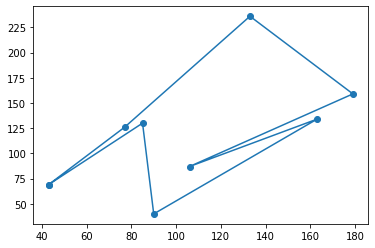

Chromosome with highest fitness is =  [['10001001', '11110101'], ['10000111', '01010000'], ['01001111', '01011110'], ['00010111', '10101011'], ['01101110', '00110011'], ['10100011', '01010100'], ['11010000', '01001100'], ['10101001', '01111010']]


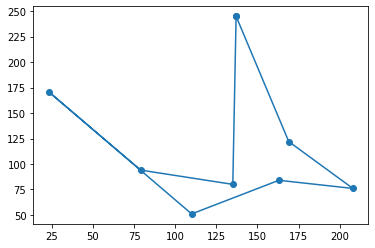

Chromosome with highest fitness is =  [['11111001', '11001101'], ['01001101', '11100000'], ['01110011', '10100010'], ['00001111', '00010011'], ['01001010', '00110011'], ['01011101', '01001000'], ['10011100', '11010110'], ['10101001', '00010010']]


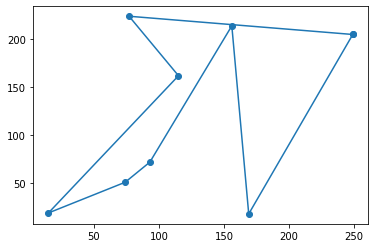

Chromosome with highest fitness is =  [['01000011', '11110111'], ['11010101', '11010010'], ['11100111', '00000000'], ['01111111', '00011111'], ['00010010', '01000101'], ['10000011', '01110110'], ['00011110', '01110110'], ['00111111', '11011000']]


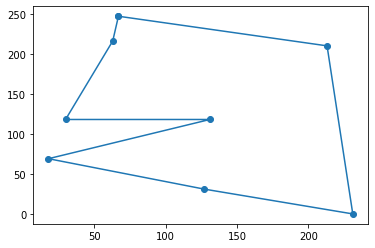

Chromosome with highest fitness is =  [['10101011', '11011001'], ['11111101', '01100100'], ['11100011', '01011010'], ['11111011', '00001011'], ['10101100', '11000101'], ['11010101', '00110100'], ['01101100', '11011110'], ['01001011', '11111110']]


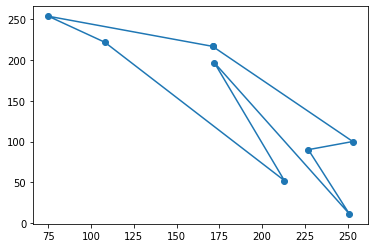

Chromosome with highest fitness is =  [['11111101', '00011001'], ['11110101', '01010010'], ['10101111', '10111100'], ['00110001', '11111101'], ['01111110', '10010101'], ['10100111', '01010100'], ['11101100', '00001110'], ['10110001', '10111000']]


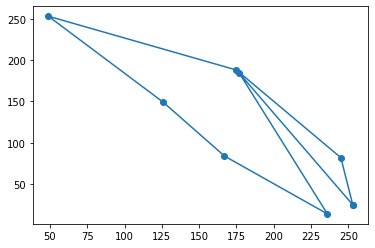

Chromosome with highest fitness is =  [['01000001', '01011011'], ['00001011', '01010100'], ['00000001', '11001010'], ['00100101', '10000001'], ['11111110', '11110101'], ['11011111', '10010000'], ['10111110', '00110000'], ['10101011', '00111100']]


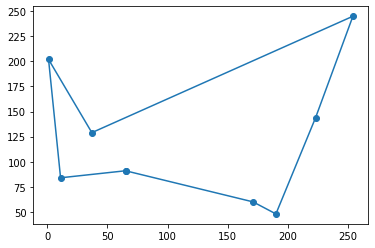

Chromosome with highest fitness is =  [['10111001', '01001011'], ['01100111', '00000110'], ['01000101', '11010010'], ['00100011', '01101111'], ['00100110', '11111011'], ['10110001', '11101000'], ['11110100', '11001010'], ['10100111', '10010110']]


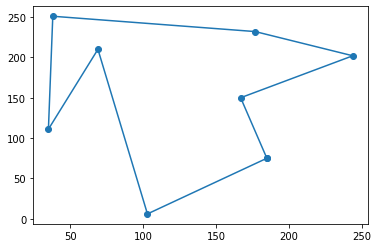

Chromosome with highest fitness is =  [['10110011', '10010101'], ['00100111', '10111100'], ['00110101', '10110000'], ['00101111', '00110101'], ['01010110', '00100101'], ['10101001', '00001000'], ['10110010', '01010000'], ['11011011', '00110100']]


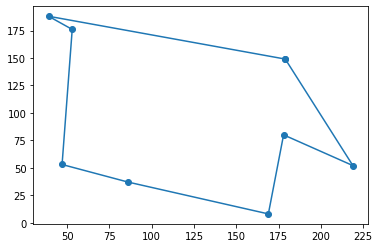

Chromosome with highest fitness is =  [['00000101', '10010111'], ['00001001', '01101000'], ['01000101', '00101100'], ['00111111', '00010011'], ['01101000', '00111011'], ['10111011', '01001100'], ['00101110', '01000110'], ['11101011', '10001110']]


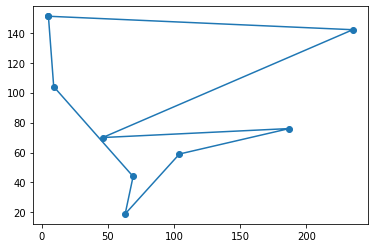

Chromosome with highest fitness is =  [['00000001', '10101001'], ['00111011', '10000100'], ['01010001', '10110010'], ['10100101', '10011101'], ['11001100', '11000101'], ['11111001', '11010000'], ['11011000', '10011000'], ['01110101', '00001010']]


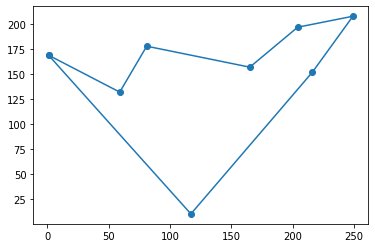

Chromosome with highest fitness is =  [['01100101', '10011111'], ['11110111', '11101110'], ['10001011', '00001100'], ['00100001', '00001011'], ['00010100', '01000101'], ['01011111', '00100110'], ['01100000', '10010100'], ['01000011', '01101010']]


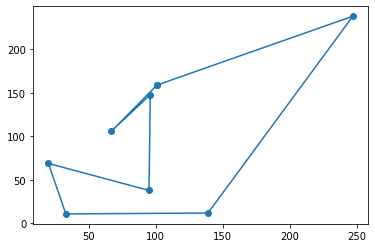

Chromosome with highest fitness is =  [['11110001', '01100011'], ['11010001', '01111000'], ['11011001', '01111010'], ['01111001', '01101011'], ['01100000', '00010111'], ['01101101', '11110010'], ['10110100', '11110110'], ['11100101', '11101100']]


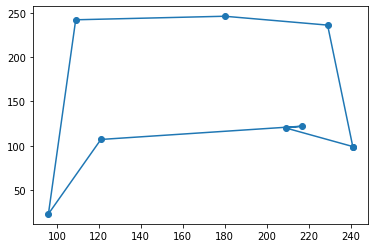

Chromosome with highest fitness is =  [['10000011', '11101011'], ['11001011', '10000000'], ['11111011', '00000010'], ['10011111', '00011111'], ['00110100', '00101001'], ['01101101', '00101110'], ['10111000', '01011110'], ['11010011', '00111110']]


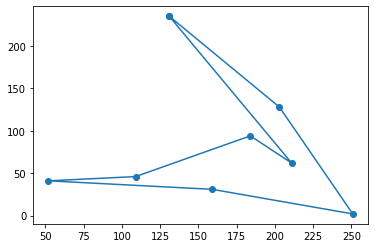

Chromosome with highest fitness is =  [['11101111', '10101011'], ['11100001', '10111010'], ['00111001', '10100010'], ['11010101', '10110101'], ['00011010', '10011011'], ['00101111', '00101000'], ['11001010', '00011010'], ['11011101', '01001000']]


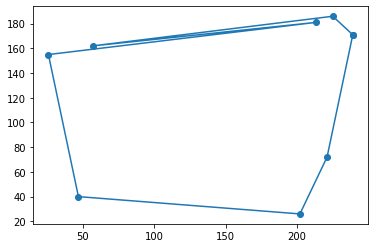

Chromosome with highest fitness is =  [['10110001', '01001001'], ['00001101', '11000000'], ['10110111', '10111100'], ['11001001', '00011001'], ['11000100', '00110011'], ['10011011', '01101110'], ['01110000', '10111000'], ['10000101', '01111100']]


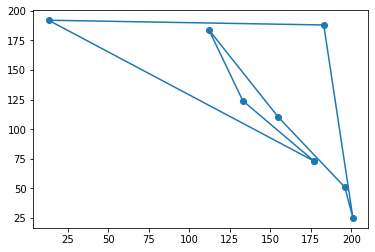

Chromosome with highest fitness is =  [['10000011', '11001011'], ['01111111', '00110000'], ['11010101', '00011110'], ['10111101', '00010101'], ['10000110', '00010111'], ['00110011', '00001100'], ['01100000', '00010010'], ['00101101', '10010010']]


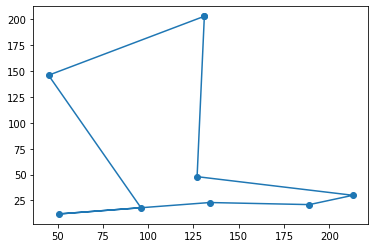

Chromosome with highest fitness is =  [['11111101', '11100111'], ['11110001', '10010010'], ['01011101', '00100100'], ['00110101', '10000101'], ['11000100', '10010101'], ['00101011', '10011100'], ['10100010', '11011110'], ['11010011', '11010000']]


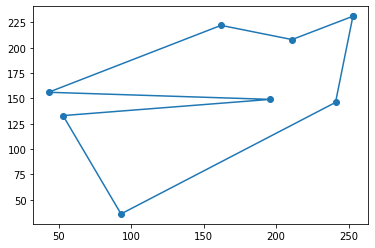

Chromosome with highest fitness is =  [['00101001', '10110101'], ['10001001', '01101110'], ['01101111', '11011100'], ['11110101', '10100101'], ['01000110', '00010001'], ['00010011', '00110010'], ['01100010', '10000000'], ['00001101', '10111000']]


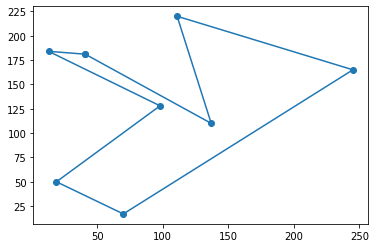

Chromosome with highest fitness is =  [['11011111', '11011001'], ['10100001', '10011000'], ['11010111', '00010100'], ['10110101', '10001101'], ['11111000', '01111111'], ['11011111', '11101000'], ['10100100', '11110000'], ['01101011', '10101110']]


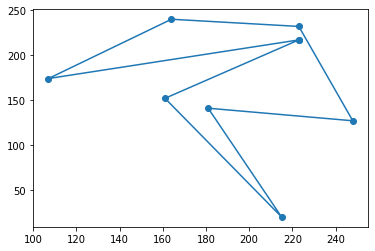

Chromosome with highest fitness is =  [['10010011', '10100101'], ['11100011', '00110110'], ['00000001', '10111010'], ['01001011', '01001001'], ['11101010', '00101001'], ['11111111', '01100100'], ['10110110', '10001010'], ['10001001', '11010000']]


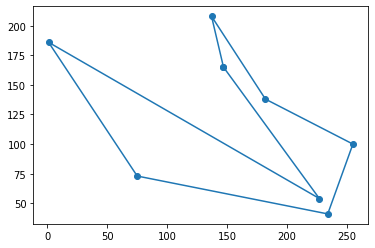

Chromosome with highest fitness is =  [['10100001', '00010011'], ['11011001', '10111010'], ['01011011', '11010110'], ['01010011', '01111111'], ['00111100', '01010101'], ['10001101', '01110100'], ['01101010', '10111010'], ['10011011', '10101100']]


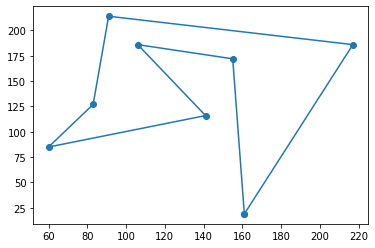

Chromosome with highest fitness is =  [['00100111', '01111111'], ['00000001', '01101010'], ['10101101', '10001100'], ['00101001', '01000011'], ['10010010', '00000001'], ['11000001', '10011000'], ['00101110', '10110110'], ['00110001', '11100110']]


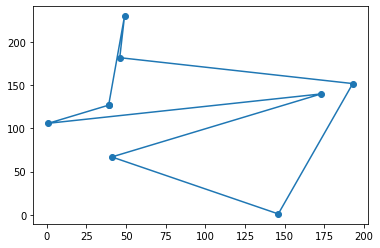

Chromosome with highest fitness is =  [['10011001', '00010001'], ['10111011', '00100000'], ['01110101', '01001000'], ['11110011', '00010001'], ['11101000', '11111011'], ['10000111', '10100010'], ['10011010', '10010010'], ['01001011', '10000000']]


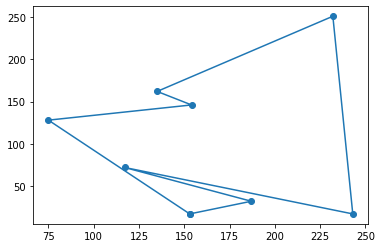

Chromosome with highest fitness is =  [['11110111', '00001011'], ['10101101', '00001010'], ['10011101', '11100000'], ['10110001', '11001111'], ['11100000', '00010111'], ['11101001', '01000000'], ['11001010', '01111110'], ['11011011', '11000010']]


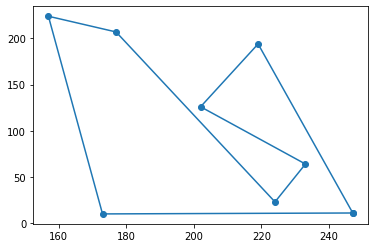

Chromosome with highest fitness is =  [['11011111', '01101011'], ['10010101', '01001100'], ['01010101', '00000110'], ['01000111', '00011111'], ['01110000', '01011111'], ['01000001', '01010110'], ['00001110', '01000100'], ['10011011', '11110010']]


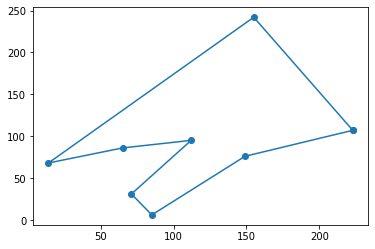

Chromosome with highest fitness is =  [['00010101', '11010001'], ['00001001', '00111110'], ['01000011', '01011110'], ['10100011', '01011001'], ['00010100', '00000101'], ['10011101', '01001100'], ['11011110', '00100010'], ['11010011', '01110100']]


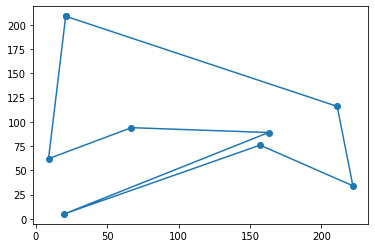

Chromosome with highest fitness is =  [['11111101', '00110101'], ['11010011', '11101010'], ['10111011', '01010100'], ['00101011', '11000011'], ['00000110', '10010011'], ['01110111', '10000110'], ['10100110', '01000110'], ['01011101', '00101000']]


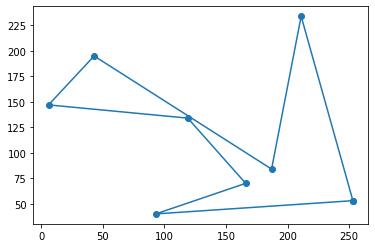

Chromosome with highest fitness is =  [['01100101', '10001011'], ['01011111', '01011110'], ['01101001', '01011000'], ['10010111', '10010001'], ['11111100', '10010001'], ['11110011', '01111000'], ['10100110', '00010010'], ['00001011', '00001010']]


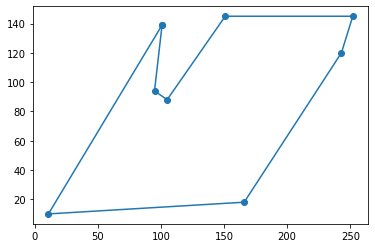

Chromosome with highest fitness is =  [['00111111', '10000001'], ['01100001', '00101110'], ['00101101', '10011010'], ['00111001', '01111011'], ['01100100', '00011111'], ['10001111', '00011000'], ['10111110', '10111010'], ['11110011', '11101110']]


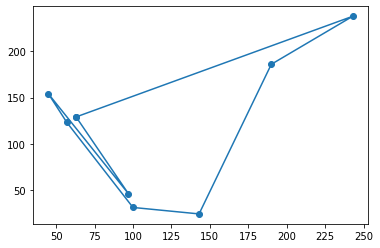

Chromosome with highest fitness is =  [['10000011', '10001001'], ['01101011', '10011100'], ['10010011', '10111100'], ['10101111', '11111111'], ['00100110', '11101011'], ['00111111', '11011100'], ['00101110', '01000110'], ['00111101', '00000000']]


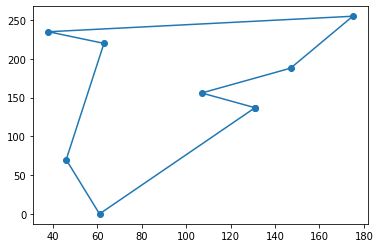

Chromosome with highest fitness is =  [['01110101', '00101111'], ['01011111', '10010110'], ['01001101', '10001100'], ['00111011', '10001001'], ['00101000', '11110101'], ['11000011', '10101000'], ['10100010', '01001010'], ['10000101', '00001000']]


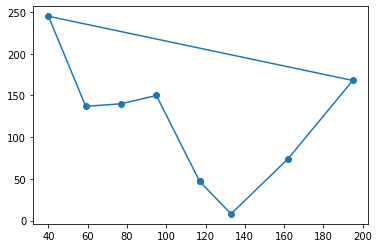

Chromosome with highest fitness is =  [['11010101', '00111111'], ['00010101', '10110100'], ['10111101', '11110100'], ['11000011', '11000101'], ['01010100', '10010101'], ['01110001', '10011110'], ['11011100', '01111000'], ['11111011', '01010110']]


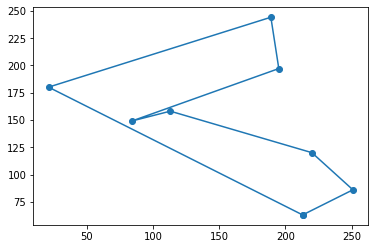

Chromosome with highest fitness is =  [['10000111', '11110101'], ['01010001', '11111010'], ['00011011', '10000110'], ['01100101', '01110001'], ['01111100', '10101001'], ['10011101', '00111110'], ['11010110', '01000100'], ['11110111', '00100010']]


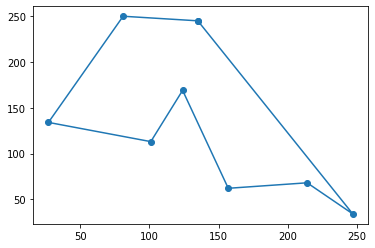

Chromosome with highest fitness is =  [['01111011', '01100011'], ['11010001', '00111000'], ['10000101', '01000010'], ['01001001', '00111101'], ['00110000', '00011101'], ['00100111', '01001010'], ['00110000', '11111110'], ['11001101', '01101100']]


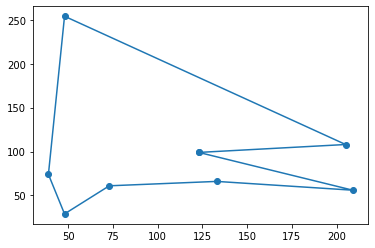

Chromosome with highest fitness is =  [['11001011', '00101111'], ['11101111', '01100100'], ['10010111', '11001110'], ['10100111', '01011001'], ['10100010', '01111001'], ['01101101', '10100100'], ['00000010', '11111100'], ['01111011', '01100100']]


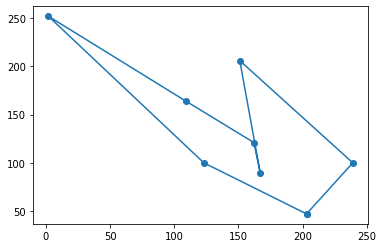

Chromosome with highest fitness is =  [['00000011', '01110111'], ['00100001', '01000110'], ['00101011', '10101010'], ['00111101', '11101001'], ['10110100', '01111101'], ['11100011', '01011100'], ['10001100', '01001000'], ['00010111', '00100110']]


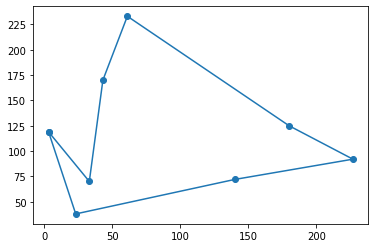

Chromosome with highest fitness is =  [['01111111', '10000101'], ['01000111', '00110100'], ['00000111', '01001010'], ['00011101', '01100101'], ['10000000', '11010111'], ['00101011', '01010000'], ['01001100', '01110010'], ['10000011', '10001000']]


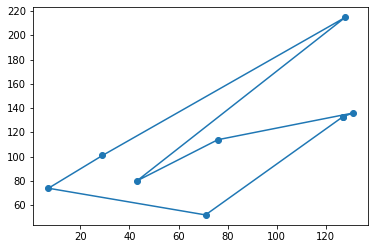

Chromosome with highest fitness is =  [['01010101', '00110001'], ['01000111', '01101110'], ['01101101', '01111110'], ['11101001', '11111011'], ['01100010', '11110001'], ['01001111', '10011000'], ['00010110', '11111000'], ['00101011', '10000110']]


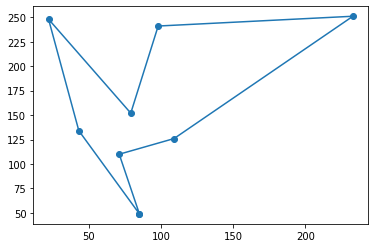

Chromosome with highest fitness is =  [['01001111', '10111011'], ['10010001', '10101010'], ['10010111', '01010010'], ['10011101', '01100011'], ['11101100', '00010001'], ['10100111', '00001000'], ['10001110', '00001100'], ['01110101', '01110000']]


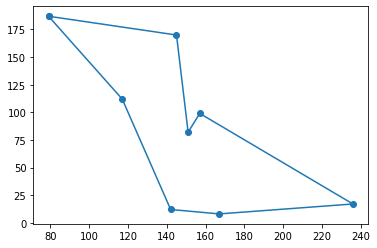

Chromosome with highest fitness is =  [['10101101', '00011111'], ['10000111', '01010010'], ['00101101', '00011100'], ['01001001', '01101101'], ['01011010', '01111001'], ['01000001', '10010000'], ['00110100', '10100000'], ['11010001', '11111000']]


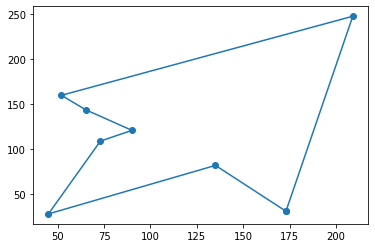

Chromosome with highest fitness is =  [['00011111', '01100001'], ['01011101', '01110110'], ['00110011', '10001100'], ['10111111', '11110101'], ['11101100', '11011111'], ['00011101', '00011110'], ['00101000', '00111010'], ['00000111', '00011110']]


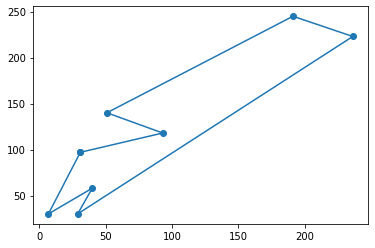

Chromosome with highest fitness is =  [['10010011', '00111011'], ['10001011', '00110000'], ['10011101', '00110100'], ['11001001', '10111011'], ['10011010', '10010101'], ['01000111', '11111100'], ['00111000', '11000110'], ['00001001', '00001100']]


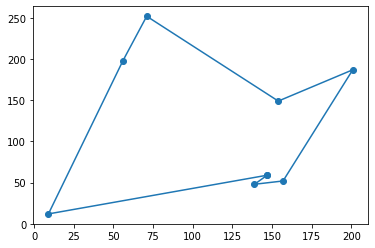

Chromosome with highest fitness is =  [['10001001', '00011101'], ['11111111', '11111010'], ['01111111', '11001110'], ['00000101', '10001001'], ['01110000', '01011101'], ['11101111', '11100100'], ['10110000', '10000100'], ['10111001', '10100000']]


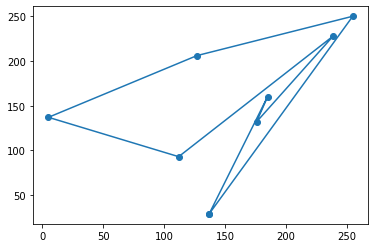

Chromosome with highest fitness is =  [['10111011', '01110011'], ['11010001', '11101110'], ['00011011', '11011110'], ['10111011', '11000001'], ['01010110', '11010001'], ['10000111', '00101010'], ['10110000', '00101010'], ['11011001', '00101010']]


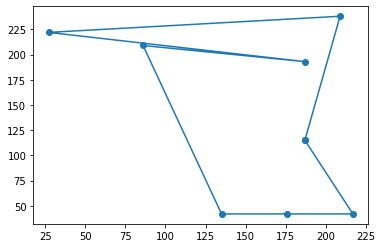

Chromosome with highest fitness is =  [['10110101', '11010011'], ['11110111', '00011010'], ['11111111', '00101110'], ['11111101', '11001101'], ['00100010', '11101101'], ['00111001', '01011010'], ['01001100', '01000100'], ['11011101', '01010110']]


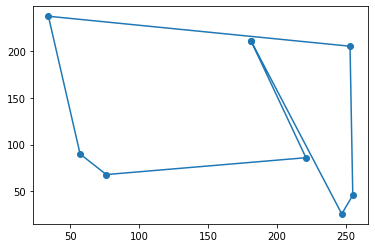

Chromosome with highest fitness is =  [['10110001', '10100111'], ['11001011', '11100010'], ['01111111', '10101100'], ['00111001', '10011101'], ['00001000', '01001101'], ['10010011', '00010110'], ['01101100', '01010000'], ['11111001', '00010000']]


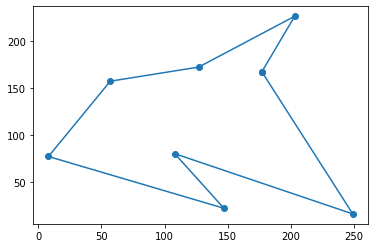

Chromosome with highest fitness is =  [['10100111', '10101101'], ['11001101', '01001110'], ['10000101', '00001010'], ['01111101', '00011011'], ['01101000', '10001111'], ['01010111', '11101110'], ['11001010', '11101010'], ['11011001', '01110100']]


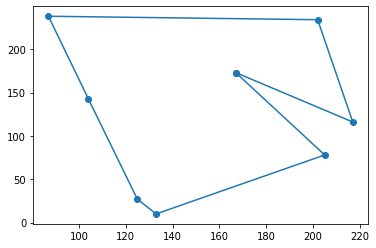

Chromosome with highest fitness is =  [['10001001', '01110111'], ['11100101', '10001010'], ['01010001', '11010110'], ['00111101', '10110101'], ['00001010', '10001101'], ['00001011', '00001000'], ['01101010', '01011110'], ['01111001', '10100000']]


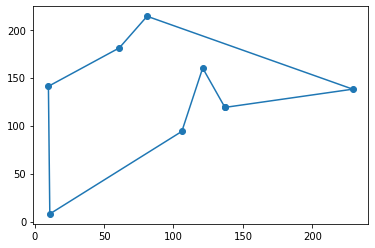

In [ ]:
GA()